In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 1.0 Data Exploration and Visualization

In [2]:
df = pd.read_csv('dataset.csv')
# Show the number of rows and columns
print(df.shape)

(2100, 18)


In [3]:
# Show the description in datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [4]:
# List the frequency of the categorical data values in each column
for column in df:
    if(df[column].dtype == object):
        print(column, ": ")
        print(df[column].value_counts(), "\n")

Gender : 
Gender
Male      1060
Female    1040
Name: count, dtype: int64 

Family_history : 
Family_history
yes    1715
no      385
Name: count, dtype: int64 

Alcohol : 
Alcohol
low       1394
none       635
medium      70
high         1
Name: count, dtype: int64 

Junk_food : 
Junk_food
yes    1855
no      245
Name: count, dtype: int64 

Snack : 
Snack
Sometimes     1754
Frequently     242
Always          53
No              51
Name: count, dtype: int64 

Smoking : 
Smoking
no     2056
yes      44
Name: count, dtype: int64 

Transportation : 
Transportation
bus           1573
car            454
walk            56
motorcycle      11
bicycle          6
Name: count, dtype: int64 

TV : 
TV
rare        947
moderate    910
often       243
Name: count, dtype: int64 

Discipline : 
Discipline
no     2004
yes      96
Name: count, dtype: int64 

Cardiovascular_risk(y) : 
Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64 



In [5]:
# Showing statistics of all numerical columns 
df.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


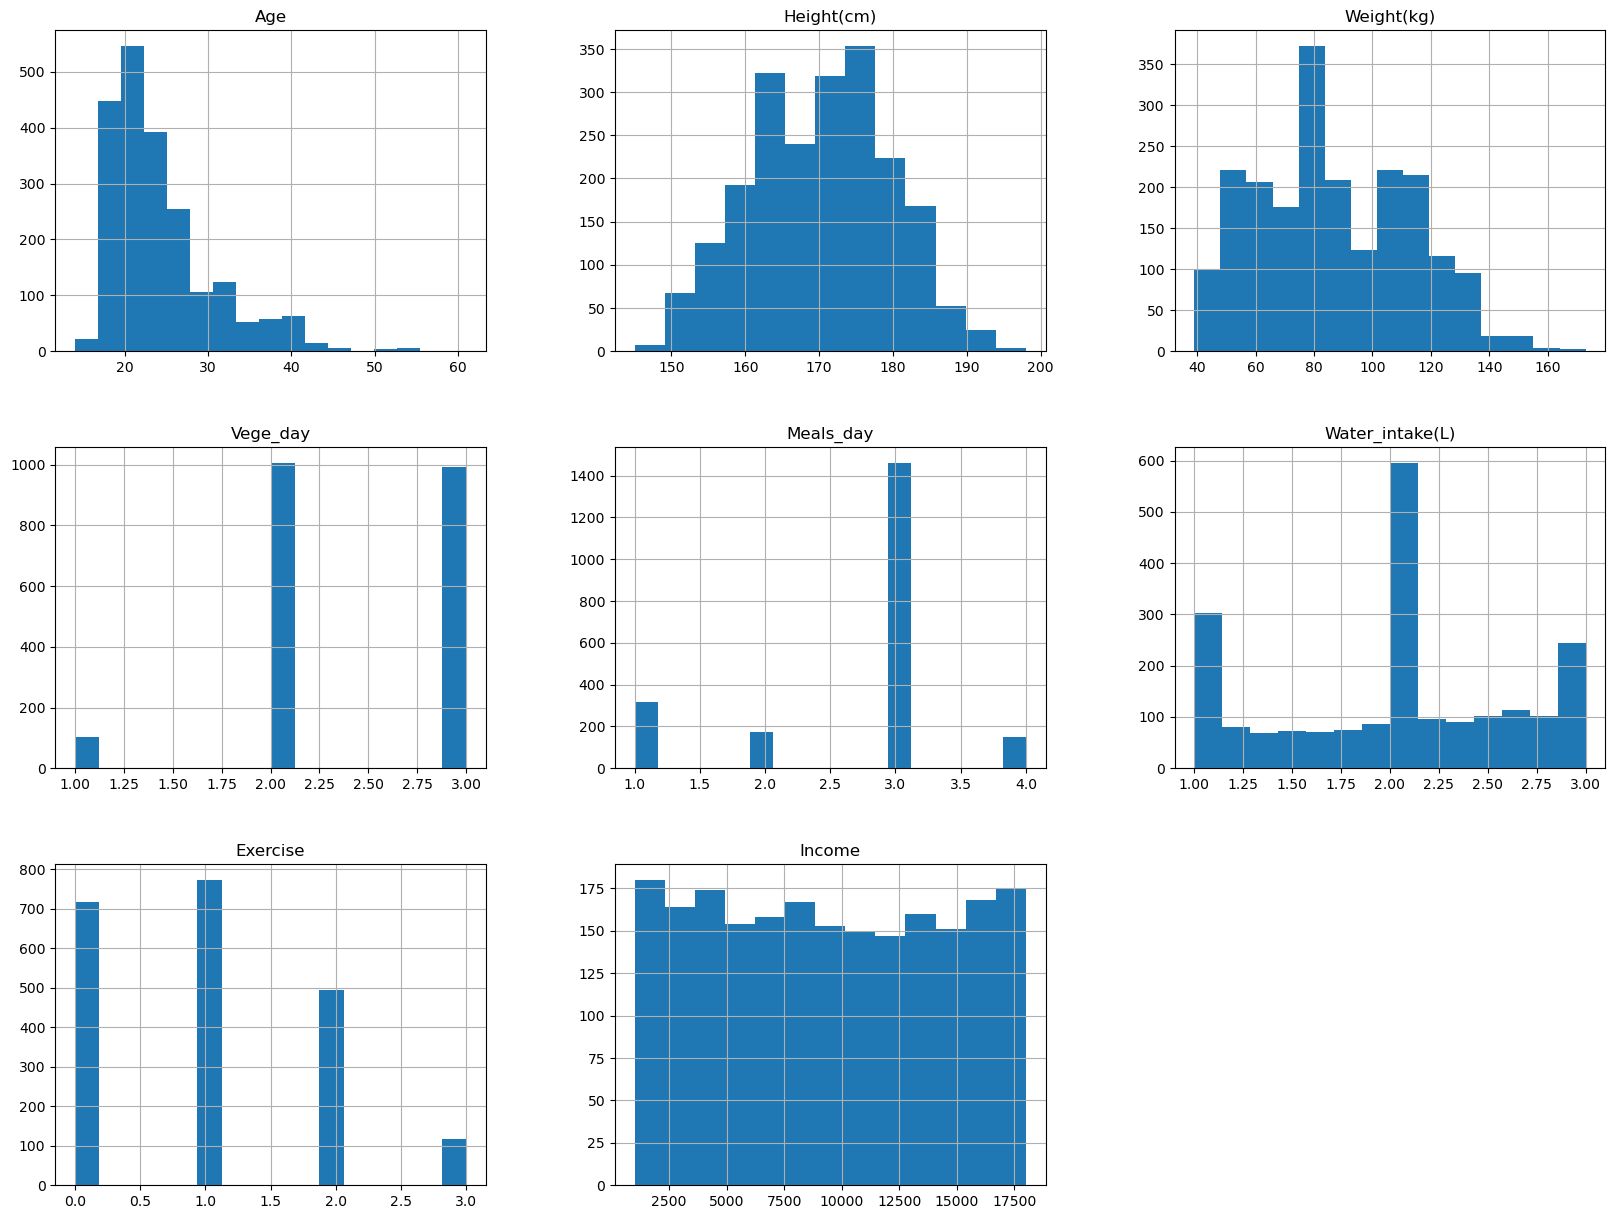

In [6]:
import matplotlib.pyplot as plt
# Plot histogram of each numerical attribute to visualize the data
df.hist(bins="doane", figsize = (20,15))

# Displaying the plot
plt.show()

<Axes: >

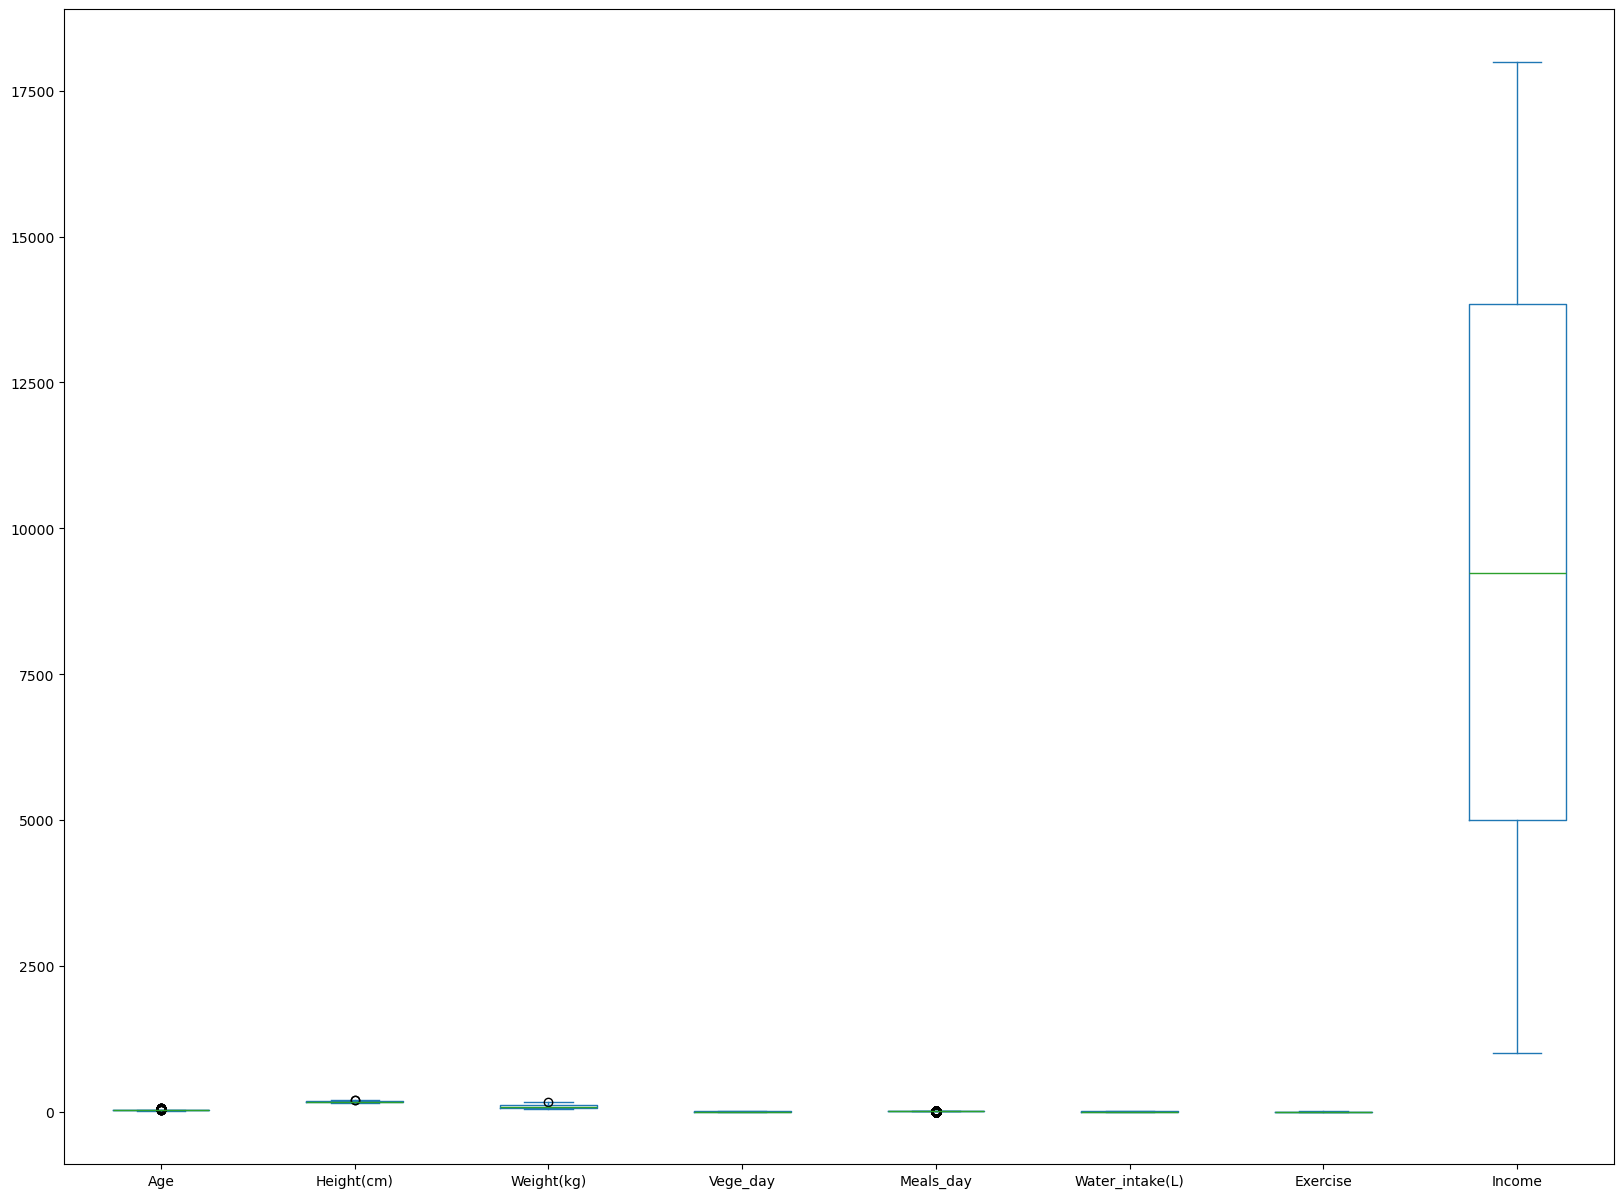

In [7]:
#show boxplot to view outliers
df.plot.box(figsize = (20,15))

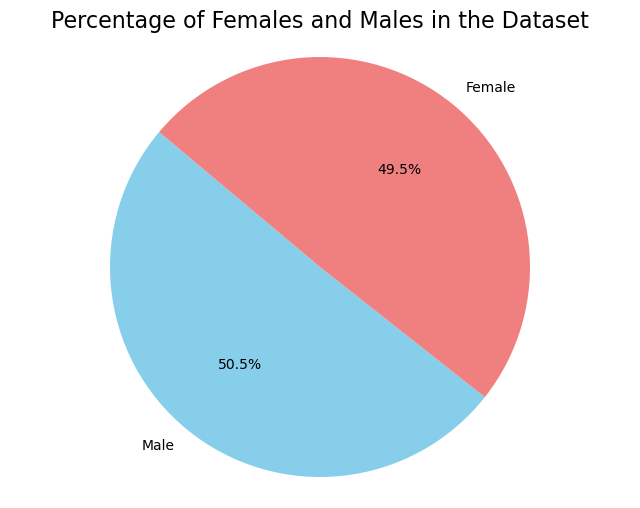

In [8]:
# Plotting the pie chart for gender
# Calculate the count of each gender
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)

# Adding title
plt.title('Percentage of Females and Males in the Dataset', fontsize=16)

# Display the plot
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

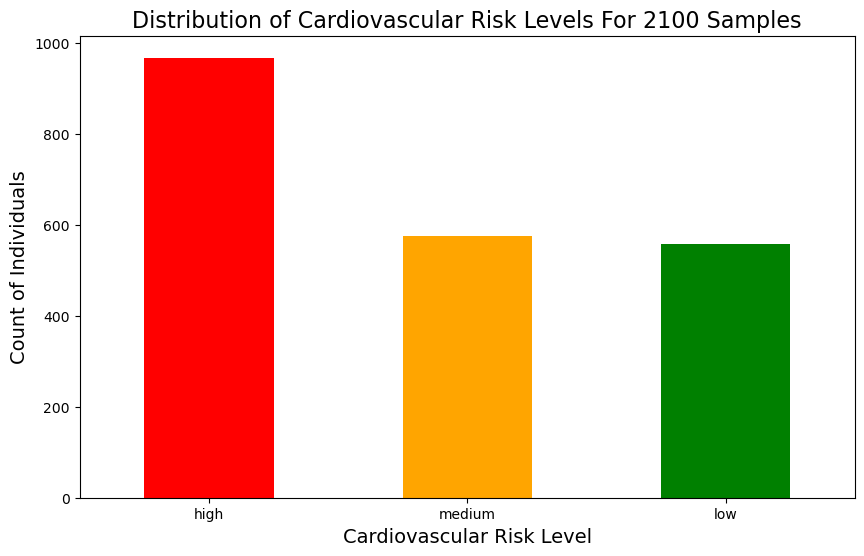

In [9]:
# Plotting the distribution of Cardiovascular Risk Levels
plt.figure(figsize=(10, 6))
df['Cardiovascular_risk(y)'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])

# Adding title and labels
plt.title('Distribution of Cardiovascular Risk Levels For 2100 Samples', fontsize=16)
plt.xlabel('Cardiovascular Risk Level', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Displaying the plot
plt.xticks(rotation=0)  
plt.show()

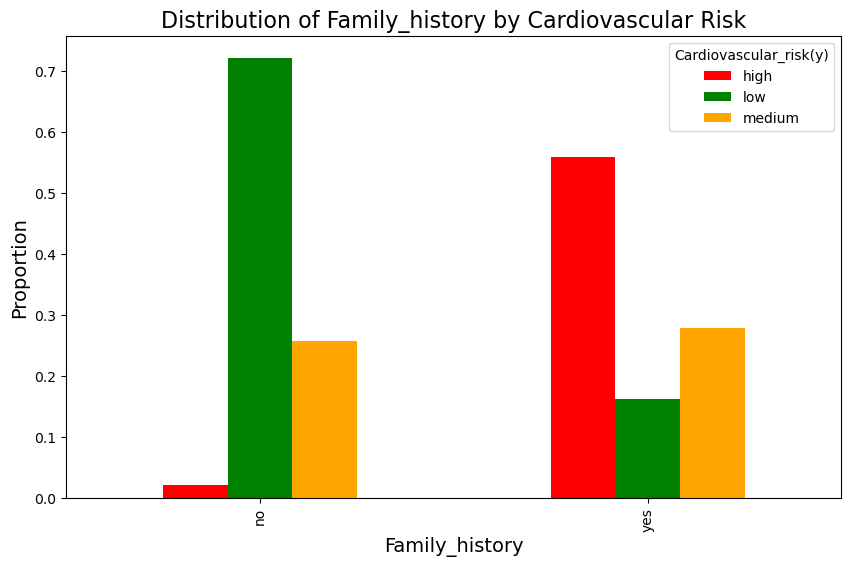

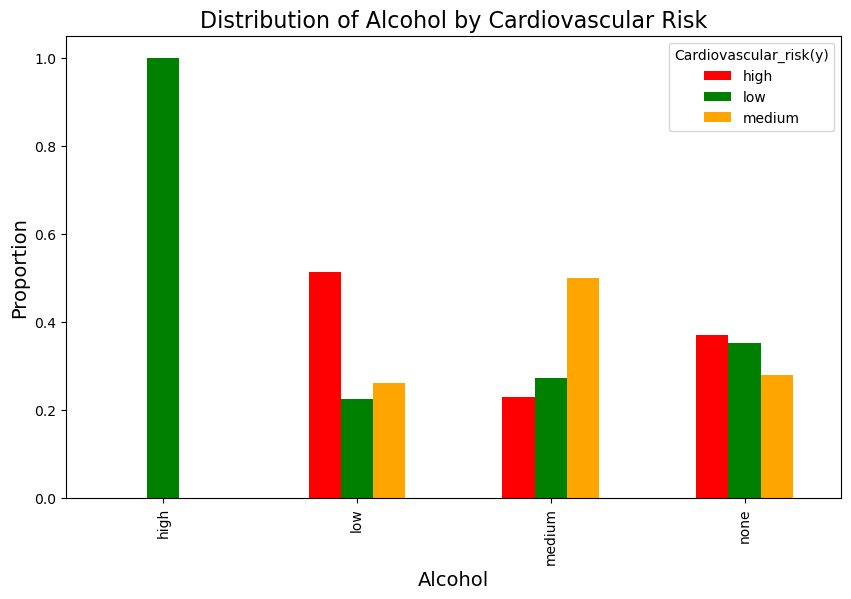

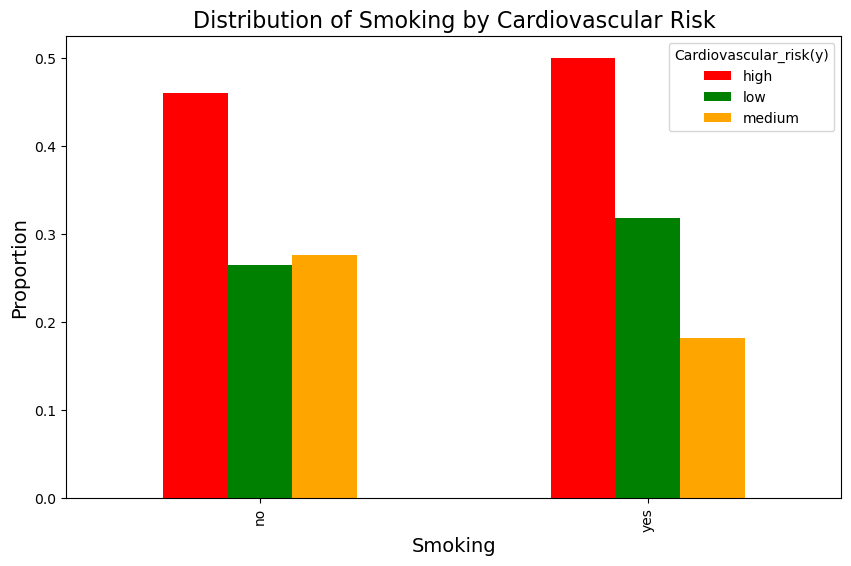

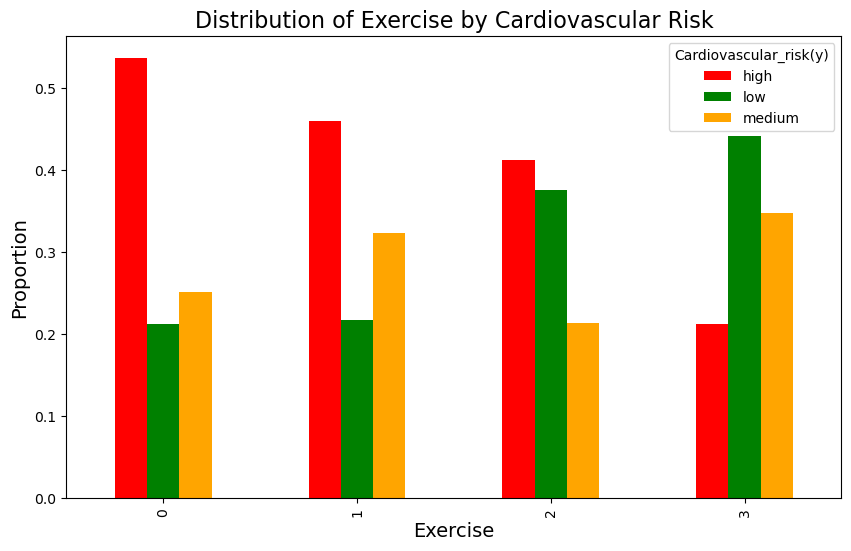

In [10]:
# Function to create a clustered bar plot
def plot_clustered_bar(df, categorical_var, risk_var):
    # Count the occurrences of each combination of categorical variable and cardiovascular risk
    counts = df.groupby([categorical_var, risk_var]).size().unstack().fillna(0)

    # Normalize to get the proportion
    proportions = counts.div(counts.sum(axis=1), axis=0)
    
    # Plotting the clustered bar plot
    proportions.plot(kind='bar', color=['red', 'green', 'orange'], figsize=(10, 6))
    
    # Adding title and labels
    plt.title(f'Distribution of {categorical_var} by Cardiovascular Risk', fontsize=16)
    plt.xlabel(categorical_var, fontsize=14)
    plt.ylabel('Proportion', fontsize=14)
    plt.legend(title=risk_var)
    
    # Display the plot
    plt.show()

# Plotting clustered bar plots for Family History vs Cardiovascular Risk Level
plot_clustered_bar(df, 'Family_history', 'Cardiovascular_risk(y)')

# Plotting clustered bar plots for Alcohol vs Cardiovascular Risk Level
plot_clustered_bar(df, 'Alcohol', 'Cardiovascular_risk(y)')

# Plotting clustered bar plots for Smoking vs Cardiovascular Risk Level
plot_clustered_bar(df, 'Smoking', 'Cardiovascular_risk(y)')

# Plotting clustered bar plots for Exercise vs Cardiovascular Risk Level
plot_clustered_bar(df, 'Exercise', 'Cardiovascular_risk(y)')

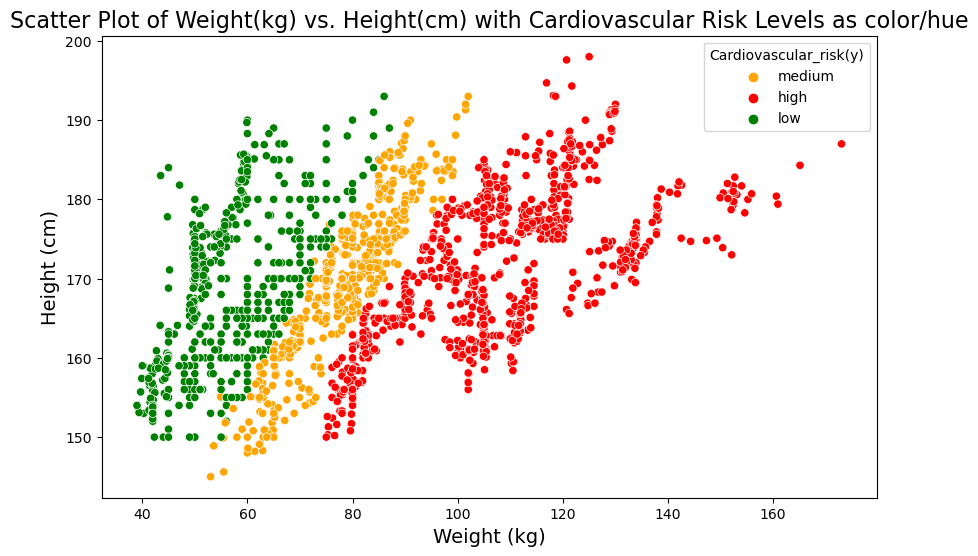

In [11]:
import seaborn as sns

# Scatter plot for Weight(kg) vs Height(cm) with Cardiovascular Risk Levels as color/hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight(kg)', y='Height(cm)', hue='Cardiovascular_risk(y)', palette=['orange', 'red', 'green'])

# Adding title and labels
plt.title('Scatter Plot of Weight(kg) vs. Height(cm) with Cardiovascular Risk Levels as color/hue', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Height (cm)', fontsize=14)

# Displaying the plot
plt.show()

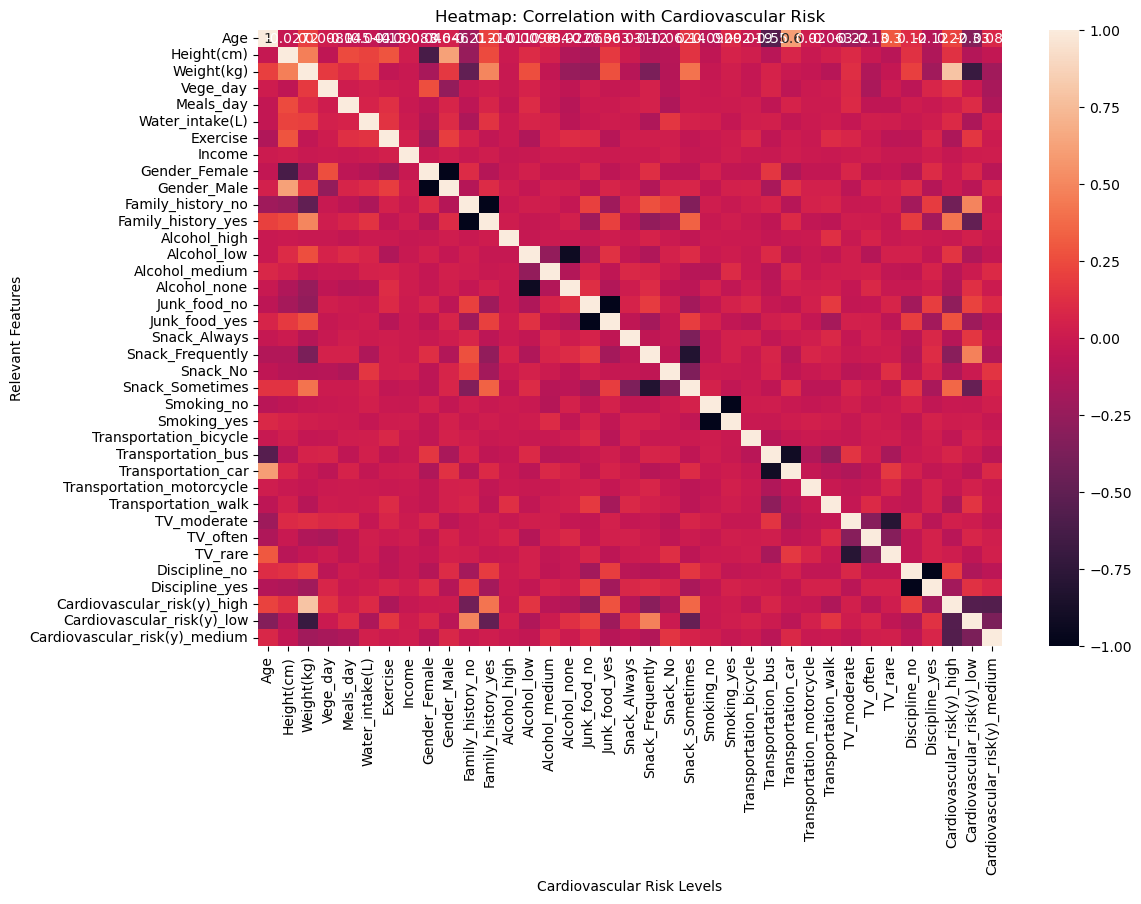

In [12]:
# Plotting the heatmap for correlations with 'Cardiovascular Risk'
# Use one-hot encoding to handle all categorical variables properly
df_encoded = pd.get_dummies(df, drop_first=False)  

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)  
plt.title('Heatmap: Correlation with Cardiovascular Risk')
plt.xlabel('Cardiovascular Risk Levels')
plt.ylabel('Relevant Features')
plt.show()

---
# 2.0 Data Perprocessing

## 2.1 Check duplicate values and check any missing values

In [13]:
# Check for duplicate record
def check_duplicates(df):
    duplicates = df[df.duplicated()]
    
    if not duplicates.empty:
        print("Duplicate rows found:")
        print(duplicates)
    else:
        print("No duplicate rows found.")

check_duplicates(df)

No duplicate rows found.


In [14]:
# Check is there any missing values
print(df.isnull().any())

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool


## 2.2 Remove the outliers

In [15]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for all numerical columns
numerical_columns = ['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day', 'Water_intake(L)', 'Exercise', 'Income']

# Removing outliers from the dataset
cleaned_data = df.copy()
for col in numerical_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, col)

# Display the number of rows removed due to outliers
removed_rows = len(df) - len(cleaned_data)
removed_rows, cleaned_data.head()

(748,
     Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
 4     Male   23       169.0        75.0            yes     low       yes   
 6   Female   21       172.0       133.9            yes     low       yes   
 8   Female   19       165.0        82.0            yes    none       yes   
 9     Male   22       187.1        89.3            yes     low       yes   
 10  Female   26       164.1       111.9            yes     low       yes   
 
     Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
 4          3          3  Sometimes      no             2.82            bus   
 6          3          3  Sometimes      no             2.42            bus   
 8          3          3  Sometimes      no             1.00            bus   
 9          2          3  Sometimes      no             1.08            bus   
 10         3          3  Sometimes      no             2.62            bus   
 
     Exercise        TV  Income Discipline Cardiovascu

In [16]:
df = cleaned_data.copy()
df.count()

Gender                    1352
Age                       1352
Height(cm)                1352
Weight(kg)                1352
Family_history            1352
Alcohol                   1352
Junk_food                 1352
Vege_day                  1352
Meals_day                 1352
Snack                     1352
Smoking                   1352
Water_intake(L)           1352
Transportation            1352
Exercise                  1352
TV                        1352
Income                    1352
Discipline                1352
Cardiovascular_risk(y)    1352
dtype: int64

## 2.3 Identify the relevant features and drop the irrelevant features

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
encoded_data = df.copy()
label_encoders = {}

for column in encoded_data.select_dtypes(include=['object']).columns:
    if column != 'Cardiovascular_risk(y)':  # Avoid encoding the target variable yet
        le = LabelEncoder()
        encoded_data[column] = le.fit_transform(encoded_data[column])
        label_encoders[column] = le

# Encoding the target variable
target_le = LabelEncoder()
encoded_data['Cardiovascular_risk(y)'] = target_le.fit_transform(encoded_data['Cardiovascular_risk(y)'])

# Separating features and target
X = encoded_data.drop('Cardiovascular_risk(y)', axis=1)
y = encoded_data['Cardiovascular_risk(y)']

# Feature importance using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Getting feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the features sorted by their importance
print("Features sorted by importance:")
print(feature_importance_df)

# Selecting the most relevant features (threshold: importance > 0.01)
relevant_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()
filtered_data = encoded_data[relevant_features + ['Cardiovascular_risk(y)']]

print(f"Selected Relevant Features: {relevant_features}")
filtered_data.head()


Features sorted by importance:
            Feature  Importance
3        Weight(kg)    0.507004
1               Age    0.076005
2        Height(cm)    0.075941
4    Family_history    0.066642
9             Snack    0.059901
11  Water_intake(L)    0.049351
15           Income    0.026928
5           Alcohol    0.023121
7          Vege_day    0.021694
0            Gender    0.020886
6         Junk_food    0.017939
12   Transportation    0.016489
13         Exercise    0.014310
14               TV    0.012644
16       Discipline    0.009040
10          Smoking    0.002105
8         Meals_day    0.000000
Selected Relevant Features: ['Weight(kg)', 'Age', 'Height(cm)', 'Family_history', 'Snack', 'Water_intake(L)', 'Income', 'Alcohol', 'Vege_day', 'Gender', 'Junk_food', 'Transportation', 'Exercise', 'TV']


,Weight(kg),Age,Height(cm),Family_history,Snack,Water_intake(L),Income,Alcohol,Vege_day,Gender,Junk_food,Transportation,Exercise,TV,Cardiovascular_risk(y)
4,75.0,23,169.0,1,3,2.82,17857,0,3,1,1,1,1,1,2
6,133.9,21,172.0,1,3,2.42,8011,0,3,0,1,1,2,0,0
8,82.0,19,165.0,1,3,1.00,10029,2,3,0,1,1,0,0,0
9,89.3,22,187.1,1,3,1.08,13784,0,2,1,1,1,0,0,2
10,111.9,26,164.1,1,3,2.62,4871,0,3,0,1,1,0,2,0


In [18]:
# Drop irrelevant columns
df.drop(columns=['Transportation', 'TV', 'Discipline', 'Meals_day'], inplace=True)

print(df.head())

    Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
4     Male   23       169.0        75.0            yes     low       yes   
6   Female   21       172.0       133.9            yes     low       yes   
8   Female   19       165.0        82.0            yes    none       yes   
9     Male   22       187.1        89.3            yes     low       yes   
10  Female   26       164.1       111.9            yes     low       yes   

    Vege_day      Snack Smoking  Water_intake(L)  Exercise  Income  \
4          3  Sometimes      no             2.82         1   17857   
6          3  Sometimes      no             2.42         2    8011   
8          3  Sometimes      no             1.00         0   10029   
9          2  Sometimes      no             1.08         0   13784   
10         3  Sometimes      no             2.62         0    4871   

   Cardiovascular_risk(y)  
4                  medium  
6                    high  
8                    high  
9         

## 2.4 Split the dataset into numerical and categorical sets 

In [19]:
# Drop columns to isolate numerical data
df_num = df.drop(columns=["Gender",
    "Family_history", "Alcohol", "Junk_food", "Snack", 
    "Smoking", "Cardiovascular_risk(y)",
])

# Extract categorical columns
df_cat = df[["Gender",
    "Family_history", "Alcohol", "Junk_food", "Snack", 
    "Smoking", 
]]

df_num.info()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1352 entries, 4 to 2098
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1352 non-null   int64  
 1   Height(cm)       1352 non-null   float64
 2   Weight(kg)       1352 non-null   float64
 3   Vege_day         1352 non-null   int64  
 4   Water_intake(L)  1352 non-null   float64
 5   Exercise         1352 non-null   int64  
 6   Income           1352 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 84.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1352 entries, 4 to 2098
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1352 non-null   object
 1   Family_history  1352 non-null   object
 2   Alcohol         1352 non-null   object
 3   Junk_food       1352 non-null   object
 4   Snack           1352 non-null   object
 5   Smoking         1352

In [20]:
# Check any missing values for numerical data
print('Number of missing values for all columns:')
df_num.isnull().sum()

Number of missing values for all columns:


Age                0
Height(cm)         0
Weight(kg)         0
Vege_day           0
Water_intake(L)    0
Exercise           0
Income             0
dtype: int64

## 2.5 Preprocessing numerical data: Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = False)
scaler.fit(df_num)       
df_num_tr = scaler.transform(df_num)

print('>>> Mean of all columns:\n', df_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', df_num_tr.std(axis=0))

>>> Mean of all columns:
 [-4.17811742e-16  1.57664808e-16 -2.89052148e-17  1.02482125e-16
  2.41752706e-16  4.07300755e-17  3.94162021e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1.]


## 2.6 Preprocessing categorical data : One-hot encoding

In [22]:
df_cat.head()

,Gender,Family_history,Alcohol,Junk_food,Snack,Smoking
4,Male,yes,low,yes,Sometimes,no
6,Female,yes,low,yes,Sometimes,no
8,Female,yes,none,yes,Sometimes,no
9,Male,yes,low,yes,Sometimes,no
10,Female,yes,low,yes,Sometimes,no


In [23]:
# Perform one-hot encoding on the categorical data
df_cat_encoded = pd.get_dummies(df_cat)

print(df_cat_encoded.head())

    Gender_Female  Gender_Male  Family_history_no  Family_history_yes  \
4           False         True              False                True   
6            True        False              False                True   
8            True        False              False                True   
9           False         True              False                True   
10           True        False              False                True   

    Alcohol_low  Alcohol_medium  Alcohol_none  Junk_food_no  Junk_food_yes  \
4          True           False         False         False           True   
6          True           False         False         False           True   
8         False           False          True         False           True   
9          True           False         False         False           True   
10         True           False         False         False           True   

    Snack_Always  Snack_Frequently  Snack_No  Snack_Sometimes  Smoking_no  \
4          Fals

In [24]:
# Convert True/False to 1/0
df_cat_encoded = df_cat_encoded.astype(int)

print(df_cat_encoded.head())

    Gender_Female  Gender_Male  Family_history_no  Family_history_yes  \
4               0            1                  0                   1   
6               1            0                  0                   1   
8               1            0                  0                   1   
9               0            1                  0                   1   
10              1            0                  0                   1   

    Alcohol_low  Alcohol_medium  Alcohol_none  Junk_food_no  Junk_food_yes  \
4             1               0             0             0              1   
6             1               0             0             0              1   
8             0               0             1             0              1   
9             1               0             0             0              1   
10            1               0             0             0              1   

    Snack_Always  Snack_Frequently  Snack_No  Snack_Sometimes  Smoking_no  \
4              

In [25]:
print('Shape of df_cat_encoded:', df_cat_encoded.shape, '\n')

Shape of df_cat_encoded: (1352, 15) 



In [26]:
# Combine numerical and categorical data
df_tr = np.hstack([df_num_tr, df_cat_encoded])

print('df_tr shape:', df_tr.shape)

df_tr shape: (1352, 22)


## 2.7 Seperate output vector from the input matrix

In [27]:
# Seperate the features of Cardiovascular risk store as X_train and output as vector y_train
X = df_tr
y = df["Cardiovascular_risk(y)"]

print ('Shape of the original dataset, train:', df_tr.shape)
print ('X: shape=', X.shape, 'type=', type(X))
print ('y: shape=', y.shape, 'type=', type(y))

Shape of the original dataset, train: (1352, 22)
X: shape= (1352, 22) type= <class 'numpy.ndarray'>
y: shape= (1352,) type= <class 'pandas.core.series.Series'>


In [28]:
# Create a mapping dictionary
mapping = {'low': 0, 'medium': 1, 'high': 2}

# Convert the array using np.vectorize with the mapping
y = np.vectorize(mapping.get)(y)

print(y)

[1 2 2 ... 1 1 2]


## 2.8 Split the dataset into training and testing set 

In [29]:
from sklearn.model_selection import train_test_split
X_train_tr, X_test_tr, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print ('full set shape=', X.shape)
print ('train shape=', X_train_tr.shape)
print ('test shape=', X_test_tr.shape)

full set shape= (1352, 22)
train shape= (1081, 22)
test shape= (271, 22)


## 2.9 Finalizing the training set

In [30]:
# Split the input matrix into two sets, one with numerical features only and the other with categorical features only.
X_train_num_tr = X_train_tr[:, :7]

# Extract categorical columns
X_train_cat_encoded = X_train_tr[:, 7:]

print('X_train_num_tr shape:', X_train_num_tr.shape)
print('X_train_cat_encoded shape:', X_train_cat_encoded.shape)

X_train_num_tr shape: (1081, 7)
X_train_cat_encoded shape: (1081, 15)


Text(0, 0.5, 'Values')

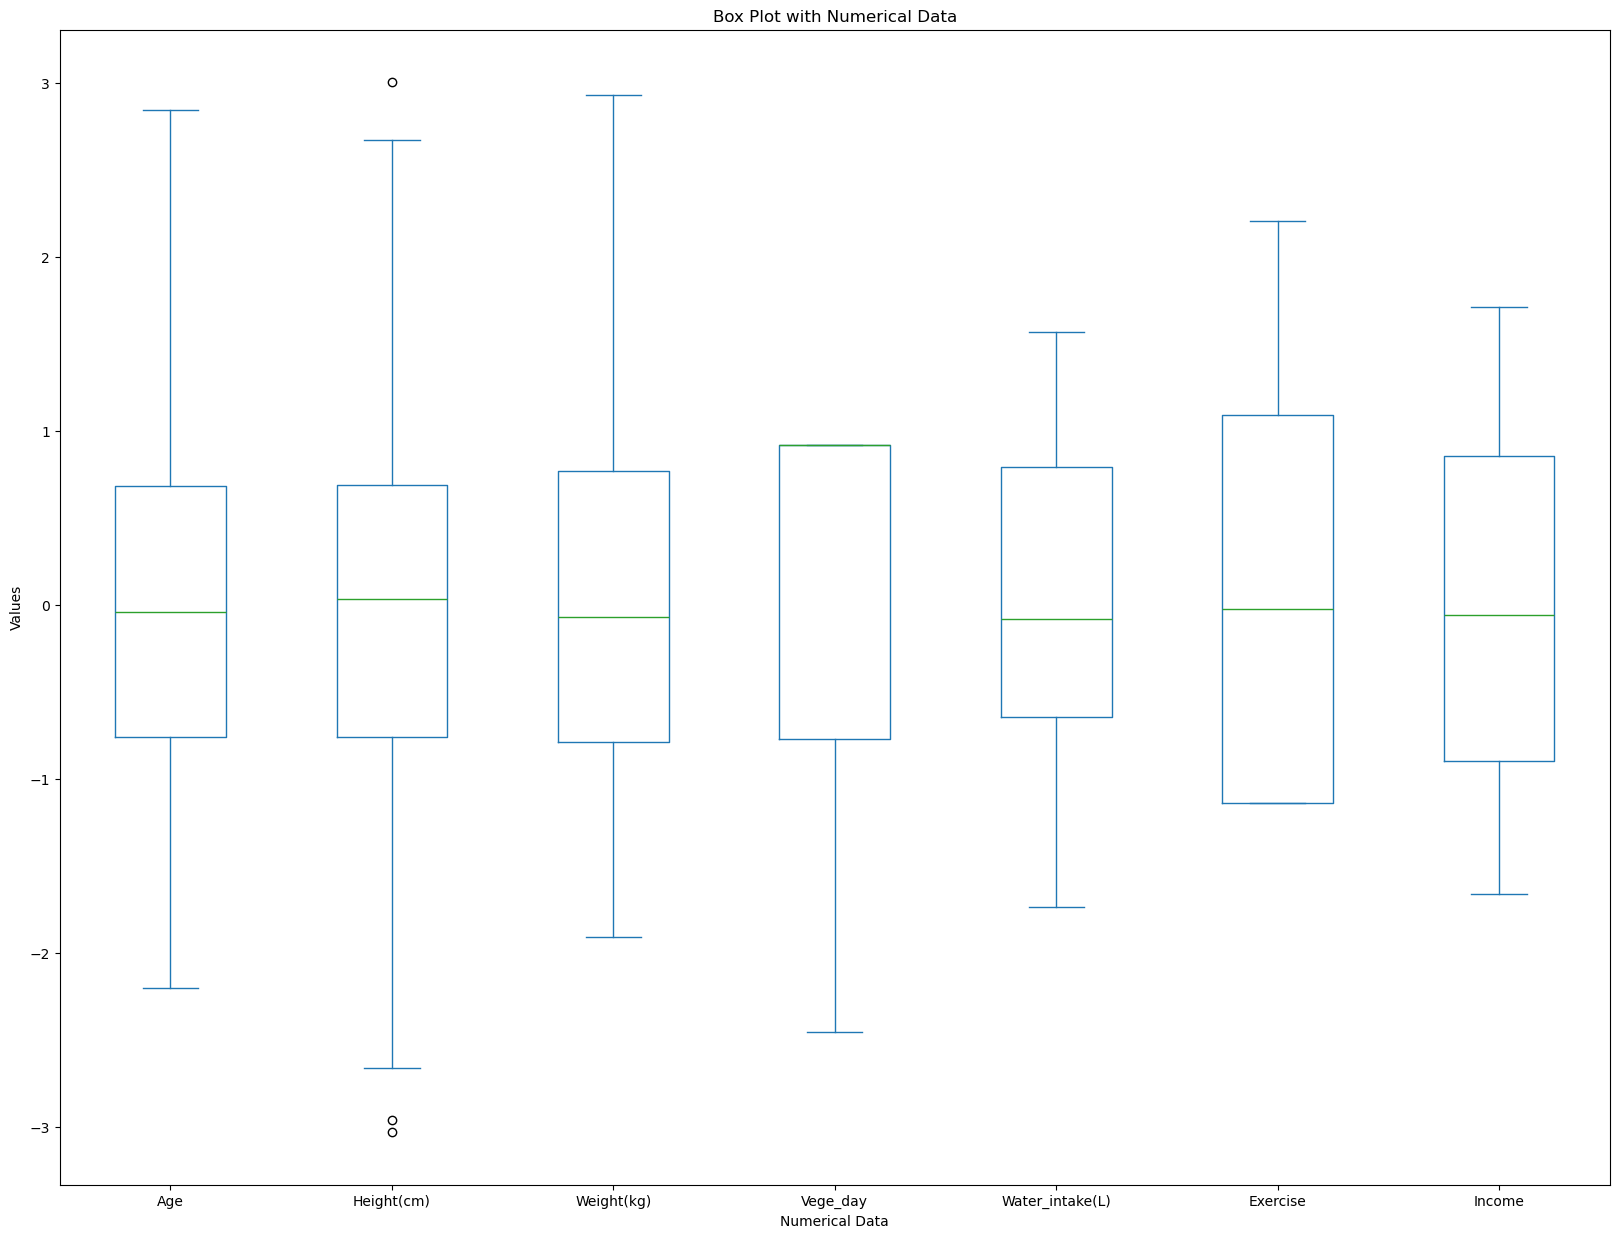

In [31]:
import matplotlib.pyplot as plt

# Visualize the numerical data using box plot
pd.DataFrame(X_train_num_tr).plot.box(figsize = (20,15))

# Rename the x-axis labels
plt.xticks(ticks=[1, 2, 3,4,5,6,7], labels=['Age', 'Height(cm)', 'Weight(kg)','Vege_day','Water_intake(L)','Exercise','Income'])

# Set the title and labels
plt.title('Box Plot with Numerical Data')
plt.xlabel('Numerical Data')
plt.ylabel('Values')

---
# 3.0 Select and Train a Model


## Model #1: Decision Tree Classifier Model
### 3.1.1 Training a Classification model

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier model
tree_clf.fit(X_train_tr, y_train)

# Predict on training set using trained classifier
y_train_pred = tree_clf.predict(X_train_tr)

# Compute accuracy on the training set
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy =', accuracy)

Accuracy = 1.0


In [110]:
# Show result of 10 random samples
def show10results(y_train, y_train_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_train_pred[i]))
        
show10results(y_train, y_train_pred)

Result for the 10 random samples:
actual =       2 pred =      2
actual =       2 pred =      2
actual =       2 pred =      2
actual =       2 pred =      2
actual =       0 pred =      0
actual =       2 pred =      2
actual =       2 pred =      2
actual =       1 pred =      1
actual =       2 pred =      2
actual =       2 pred =      2


### 3.1.2 Evaluating a model using cross-validation

In [120]:
from sklearn.model_selection import cross_val_score

# use cross_val_score on tree_reg
cv_scores = cross_val_score(tree_clf, X_train_tr, y_train, 
                                scoring = 'accuracy', cv=5)

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold: {cv_scores}')

# Print the mean of the cross-validation scores
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores for each fold: [0.95391705 0.96759259 0.95833333 0.97685185 0.97685185]
Mean cross-validation score: 0.9667093360641749


### 3.1.3 Fine-tune the model using Grid Search

In [121]:
from sklearn.model_selection import GridSearchCV

# define param_grid (you may used the one defined above)
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2', 0.5, 10]
}
# create an instance of GridSearchCV using param_grid with 5-fold cv
grid_search = GridSearchCV(estimator=tree_clf, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)

print ('Performing grid search...', end = '')
# perform grid search
grid_search.fit(X_train_tr, y_train)

print('done')

Performing grid search...Fitting 5 folds for each of 540 candidates, totalling 2700 fits
done


In [122]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

In [123]:
print('Best hyperparameter settings:', grid_search.best_params_)
print('Accuracy of the best model =', (grid_search.best_score_))

Best hyperparameter settings: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy of the best model = 0.9731780167264039


### 3.1.4 Evaluate system on unseen data

In [124]:
print(X_test_tr.shape)

(271, 22)


In [125]:
# Split the input matrix into two sets, one with numerical features only and the other with categorical features only.
X_test_num_tr = X_test_tr[:, :7]

# Extract categorical columns
X_test_cat_encoded = X_test_tr[:, 7:]

print('X_test_num_tr shape:', X_test_num_tr.shape)
print('X_test_cat_encoded shape:', X_test_cat_encoded.shape)

X_test_num_tr shape: (271, 7)
X_test_cat_encoded shape: (271, 15)


In [126]:
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_encoded])

print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_test_tr shape: (271, 22)
y_test shape: (271,)


In [138]:
from sklearn.metrics import accuracy_score

# Evaluate the best model on the test set (Classification)
y_test_pred = best_model.predict(X_test_tr)

# Calculate accuracy (or another classification metric)
final_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy =', final_accuracy)

Accuracy = 0.988929889298893


In [128]:
X_train_tr=(pd.DataFrame(X_train_tr))

In [132]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

# Fit the model
tree_clf.fit(X_train_tr, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

In [133]:
def show_matrix(cm):
    # Calculate the counts and percentages
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    
    # Combine counts and percentages
    labels = np.array([f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)])
    labels = labels.reshape(cm.shape)
    
    # Create heatmap
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, 
                     annot_kws={"size": 12})  # Adjust size for better readability
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j + 0.5, i + 0.5, labels[i, j],
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='black',
                    fontsize=12)
    
    ax.set_title('Confusion Matrix with counts and percentages\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    
    # Set the tick labels for the classes
    ax.xaxis.set_ticklabels(['Low', 'Medium', 'High'])
    ax.yaxis.set_ticklabels(['Low', 'Medium', 'High'])
    
    # Display the visualization of the Confusion Matrix
    plt.show()

Model Accuracy = 0.996299722479186
Accuracy with all-false values = 0.2506938020351526
Model Cross_val_score = [0.96774194 0.97222222 0.97222222 0.97222222 0.98148148]


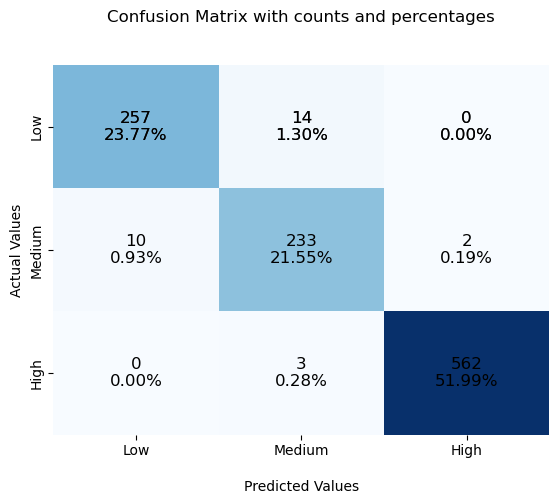

In [140]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, precision_recall_curve, 
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import numpy as np

# Predict on training data
y_train_pred = tree_clf.predict(X_train_tr)

# Test model accuracy
acc = accuracy_score(y_train, y_train_pred)
print('Model Accuracy =', acc)

# Test model accuracy with all false values
y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy with all-false values =', accuracy_score(y_train, y_train_allfalse))

# Compute cross_val_score
cv_score_1 = cross_val_score(tree_clf, X_train_tr, y_train, cv=5, scoring='accuracy')
print('Model Cross_val_score =', cv_score_1)

# Cross-val predict
y_pred_cv_1 = cross_val_predict(tree_clf, X_train_tr, y_train, cv=5)

# Compute confusion matrix
labels = [0,1,2]
cm1 = confusion_matrix(y_train, y_pred_cv_1, labels=labels)
show_matrix(cm1)

In [135]:
# Cross-val predict then compute precision_score, recall_score, and f1_score
print('Precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_1, average='macro')))
print('Recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_1, average='macro')))
print('F1 Score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_1, average='macro')))

Precision = 0.9637
Recall    = 0.9647
F1 Score  = 0.9641


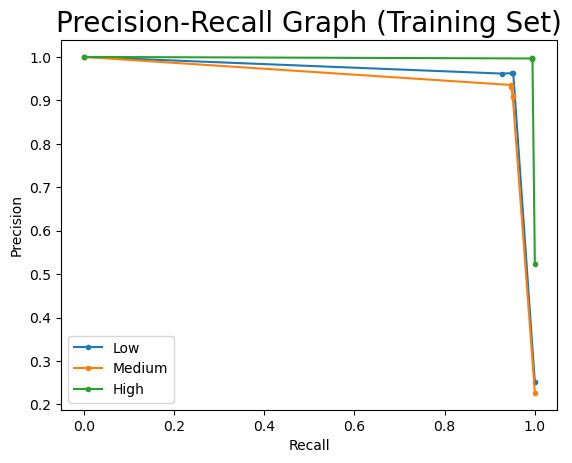

In [136]:
# For Decision Trees, you typically use `predict_proba` for probabilities
y_pred_proba = cross_val_predict(tree_clf, X_train_tr, y_train, cv=5, method='predict_proba')

label = ['Low', 'Medium', 'High'] 
# Compute precision_recall_curve and visualize (One-vs-Rest for multiclass)
for i in range(y_pred_proba.shape[1]):
    precision_1, recall_1, _ = precision_recall_curve(y_train == i, y_pred_proba[:, i])
    plt.plot(recall_1, precision_1, marker='.', label=label[i])
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

AUC = 0.9697
AUC = 0.9656
AUC = 0.9954


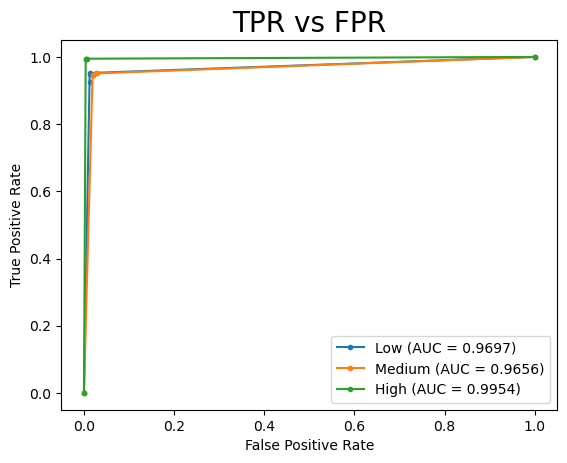

In [137]:
# Compute ROC curve and ROC AUC score (One-vs-Rest for multiclass)
for i in range(y_pred_proba.shape[1]):
    fpr_1, tpr_1, _ = roc_curve(y_train == i, y_pred_proba[:, i])
    auc_1 = roc_auc_score(y_train == i, y_pred_proba[:, i])
    plt.plot(fpr_1, tpr_1, marker='.', label=f'{label[i]} (AUC = {auc_1:.4f})')
    print('AUC = {:.4f}'.format(auc_1))
plt.title('TPR vs FPR', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

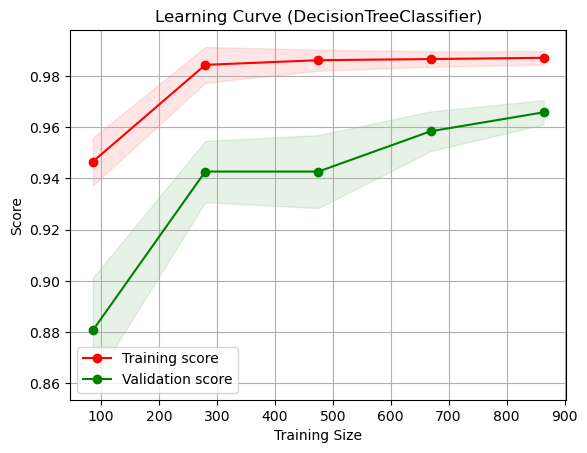

In [50]:
from sklearn.model_selection import learning_curve

# Generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    tree_clf, X_train_tr, y_train, cv=5, scoring='accuracy', 
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve (DecisionTreeClassifier)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

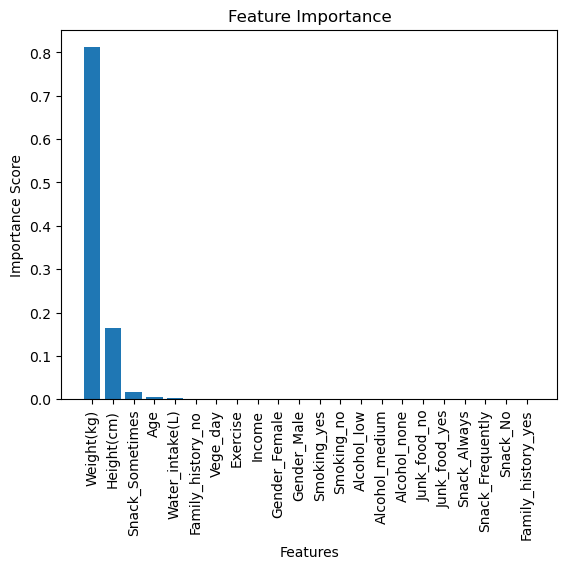

In [51]:
# Get feature importances
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Water_intake(L)', 'Exercise', 'Income', 'Gender_Female', 'Gender_Male', 'Family_history_no', 'Family_history_yes', 'Alcohol_low', 'Alcohol_medium', 'Alcohol_none', 'Junk_food_no', 'Junk_food_yes', 'Snack_Always', 'Snack_Frequently', 'Snack_No', 'Snack_Sometimes', 'Smoking_no', 'Smoking_yes'])

# Plot feature importances
plt.figure()
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [52]:
from sklearn.metrics import classification_report
# Classification report for the training set
report = classification_report(y_train, y_train_pred, target_names=['low', 'medium', 'high'])
print(report)

              precision    recall  f1-score   support

         low       0.97      0.99      0.98       271
      medium       0.98      0.96      0.97       245
        high       1.00      1.00      1.00       565

    accuracy                           0.99      1081
   macro avg       0.98      0.98      0.98      1081
weighted avg       0.99      0.99      0.99      1081



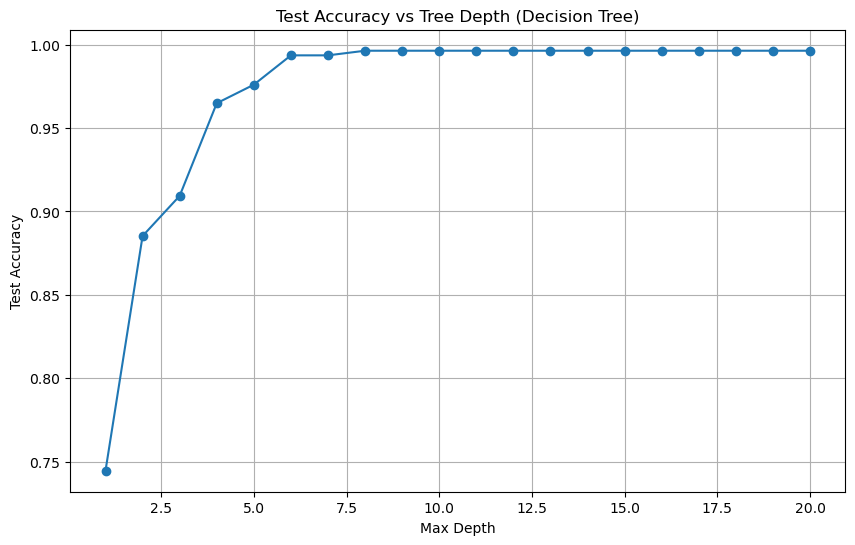

In [54]:
# Define the range of `max_depth` to tune (from shallow to deep trees)
max_depth_range = range(1, 21)  # Varying `max_depth` from 1 to 20

# Initialize a list to store accuracy results
accuracies = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_train_tr)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, accuracies, marker='o')
plt.title('Test Accuracy vs Tree Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


Cohen's Kappa for the last max_depth: 0.9939589195351554


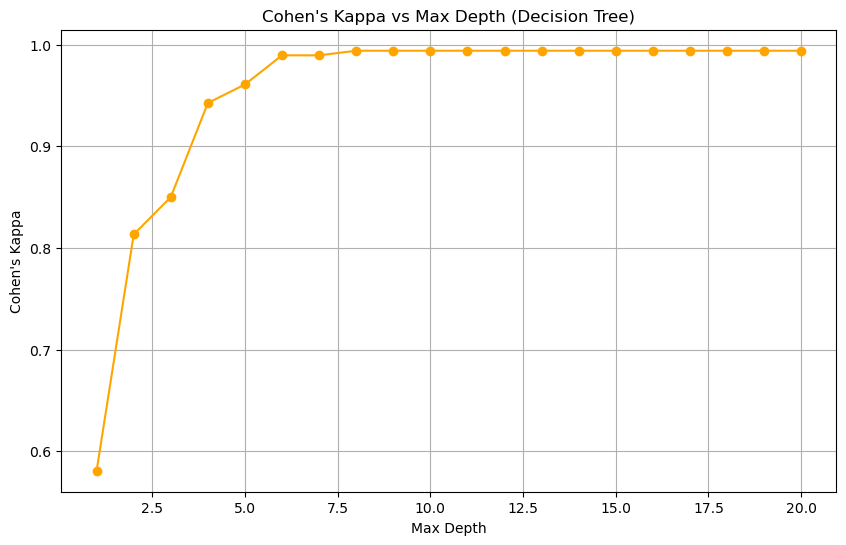

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

# Define the range for `max_depth`
max_depth_range = range(1, 21)  # From depth 1 to 20

# Initialize a list to store Cohen's Kappa results
kappas = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the training set (for Cohen's Kappa)
    y_train_pred = model.predict(X_train_tr)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_train, y_train_pred)
    kappas.append(kappa)

print(f'Cohen\'s Kappa for the last max_depth: {kappa}')

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Cohen's Kappa
plt.plot(max_depth_range, kappas, marker='o', color='orange')
plt.title('Cohen\'s Kappa vs Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Cohen\'s Kappa')
plt.grid(True)
plt.show()


In [57]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_train, y_train_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 0.9939811526354628


In [58]:
from sklearn.metrics import hamming_loss

h_loss = hamming_loss(y_train, y_train_pred)
print(f'Hamming Loss: {h_loss}')

Hamming Loss: 0.0037002775208140612


Balanced Accuracy for the last max_depth: 0.9945578231292517


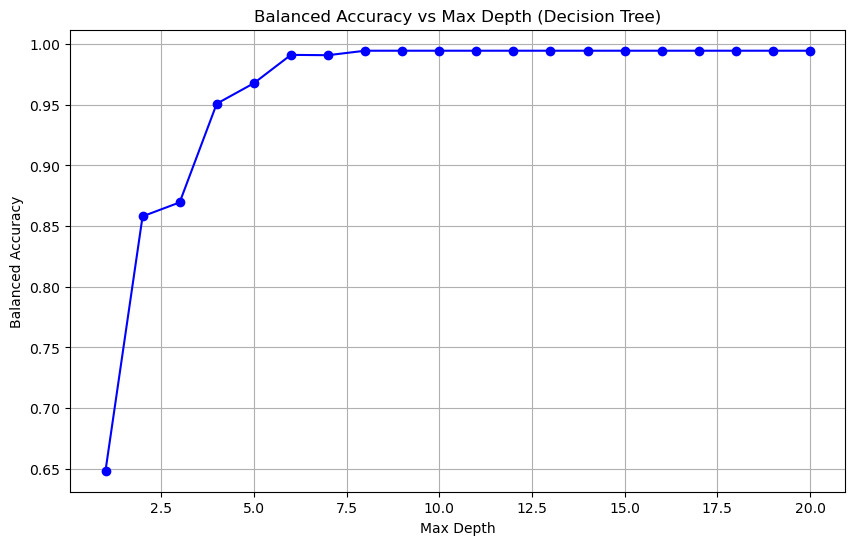

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# Define the range for `max_depth`
max_depth_range = range(1, 21)  # From depth 1 to 20

# Initialize a list to store balanced accuracy results
balanced_accuracies = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train_tr)
    
    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    balanced_accuracies.append(balanced_accuracy)

print(f'Balanced Accuracy for the last max_depth: {balanced_accuracy}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, balanced_accuracies, marker='o', color='blue')
plt.title('Balanced Accuracy vs Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()


Number of Max Depth: 20, Jaccard Index: 0.9897093382807669


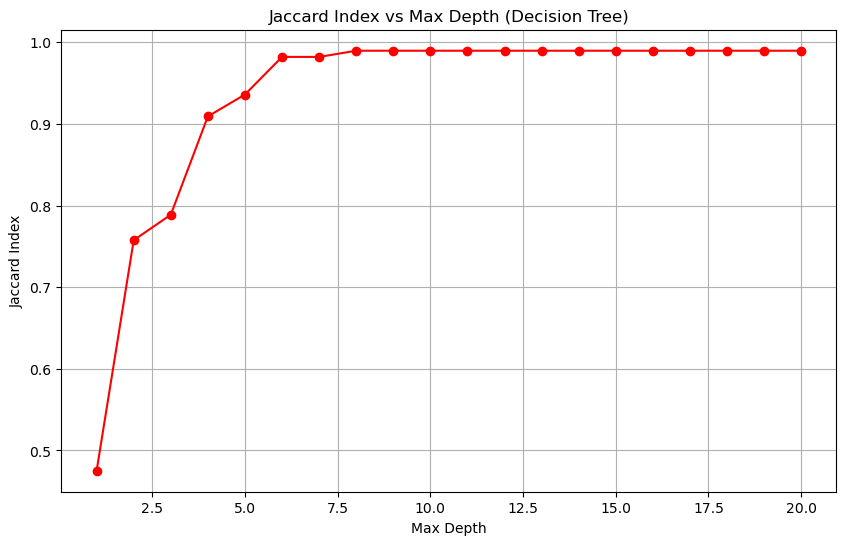

In [144]:
from sklearn.metrics import accuracy_score, jaccard_score

# Define the range for `max_depth`
max_depth_range = range(1, 21)  # From depth 1 to 20

# Initialize lists to store accuracy and Jaccard index results
accuracies = []
jaccard_indices = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_train_pred = model.predict(X_train_tr)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_train, y_train_pred)
    accuracies.append(accuracy)
    
    # Calculate Jaccard Index on the test set
    jaccard = jaccard_score(y_train, y_train_pred, average='macro')
    jaccard_indices.append(jaccard)

print(f'Number of Max Depth: {max_depth}, Jaccard Index: {jaccard}')

# Plot Accuracy vs Max Depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, jaccard_indices, marker='o', color='r')
plt.title('Jaccard Index vs Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Jaccard Index')
plt.grid(True)
plt.show()

### 3.1.5 Evaluate model on test set

Model Accuracy = 0.988929889298893
Accuracy with all-false values = 0.26199261992619927
Model Cross_val_score = [0.90909091 0.92592593 0.98148148 0.98148148 0.98148148]


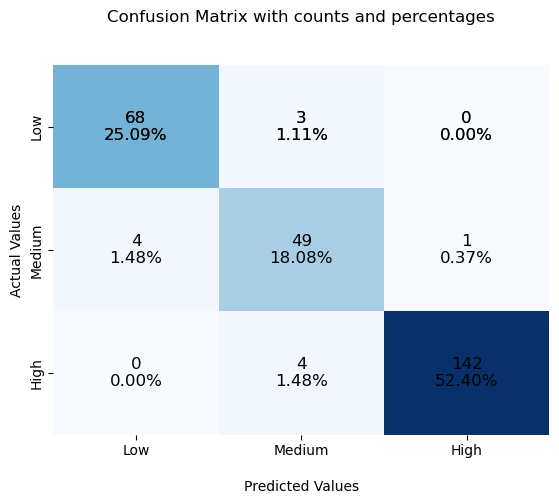

In [142]:
# Predict on testing data
y_test_pred = tree_clf.predict(X_test_tr)

# Test model accuracy
acc = accuracy_score(y_test, y_test_pred)
print('Model Accuracy =', acc)

# Test model accuracy with all false values
y_test_allfalse = np.zeros(len(y_test), dtype=bool)
print('Accuracy with all-false values =', accuracy_score(y_test, y_test_allfalse))

# Compute cross_val_score
cv_score_1 = cross_val_score(tree_clf, X_test_tr, y_test, cv=5, scoring='accuracy')
print('Model Cross_val_score =', cv_score_1)

# Cross-val predict
y_pred_cv_1 = cross_val_predict(tree_clf, X_test_tr, y_test, cv=5)

# Compute confusion matrix
labels = [0,1,2]
cm1 = confusion_matrix(y_test, y_pred_cv_1, labels=labels)
show_matrix(cm1)

In [143]:
# Cross-val predict then compute precision_score, recall_score, and f1_score
print('Precision = {:.4f}'.format(precision_score(y_test, y_pred_cv_1, average='macro')))
print('Recall    = {:.4f}'.format(recall_score(y_test, y_pred_cv_1, average='macro')))
print('F1 Score  = {:.4f}'.format(f1_score(y_test, y_pred_cv_1, average='macro')))

Precision = 0.9375
Recall    = 0.9459
F1 Score  = 0.9416


In [69]:
from sklearn.metrics import classification_report
# Classification report for the training set
report = classification_report(y_test, y_test_pred, target_names=['low', 'medium', 'high'])
print(report)

              precision    recall  f1-score   support

         low       0.97      0.97      0.97        71
      medium       0.96      0.96      0.96        54
        high       1.00      1.00      1.00       146

    accuracy                           0.99       271
   macro avg       0.98      0.98      0.98       271
weighted avg       0.99      0.99      0.99       271



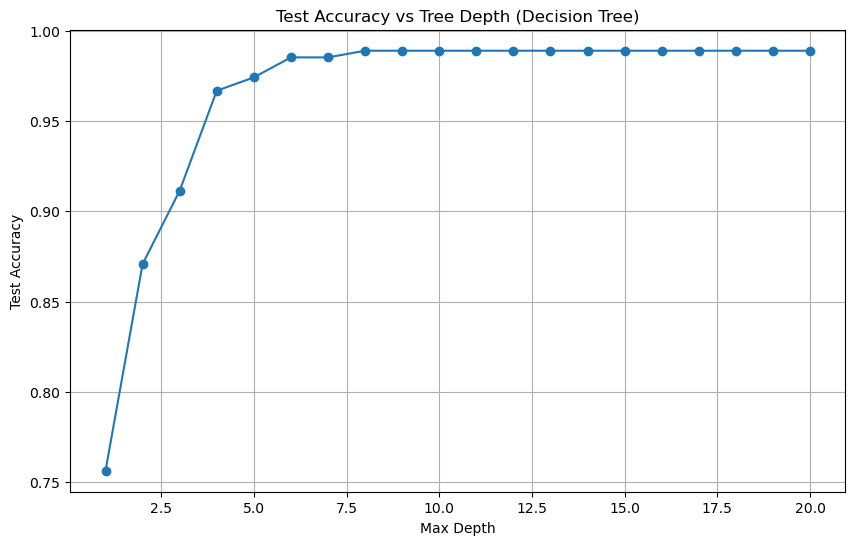

In [70]:
# Initialize a list to store accuracy results
accuracies = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tr)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, accuracies, marker='o')
plt.title('Test Accuracy vs Tree Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


Cohen's Kappa for the last max_depth: 0.9816000905284599


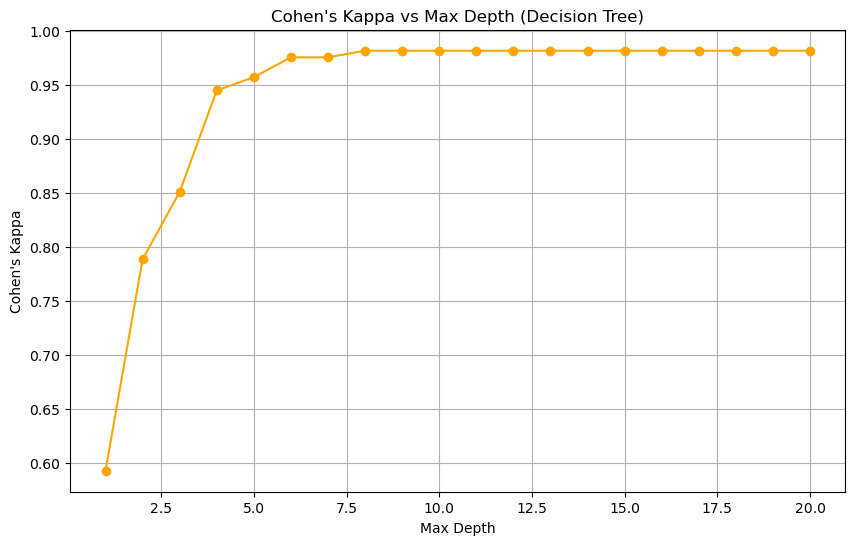

In [72]:
from sklearn.metrics import cohen_kappa_score

# Define the range for `max_depth`
max_depth_range = range(1, 21)  # From depth 1 to 20

# Initialize a list to store Cohen's Kappa results
kappas = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the training set (for Cohen's Kappa)
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_test_pred)
    kappas.append(kappa)

print(f'Cohen\'s Kappa for the last max_depth: {kappa}')

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Cohen's Kappa
plt.plot(max_depth_range, kappas, marker='o', color='orange')
plt.title('Cohen\'s Kappa vs Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Cohen\'s Kappa')
plt.grid(True)
plt.show()

In [64]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_test_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 0.9754573446839341


In [65]:
from sklearn.metrics import hamming_loss

h_loss = hamming_loss(y_test, y_test_pred)
print(f'Hamming Loss: {h_loss}')

Hamming Loss: 0.014760147601476014


Balanced Accuracy for the last max_depth: 0.9844374891323248


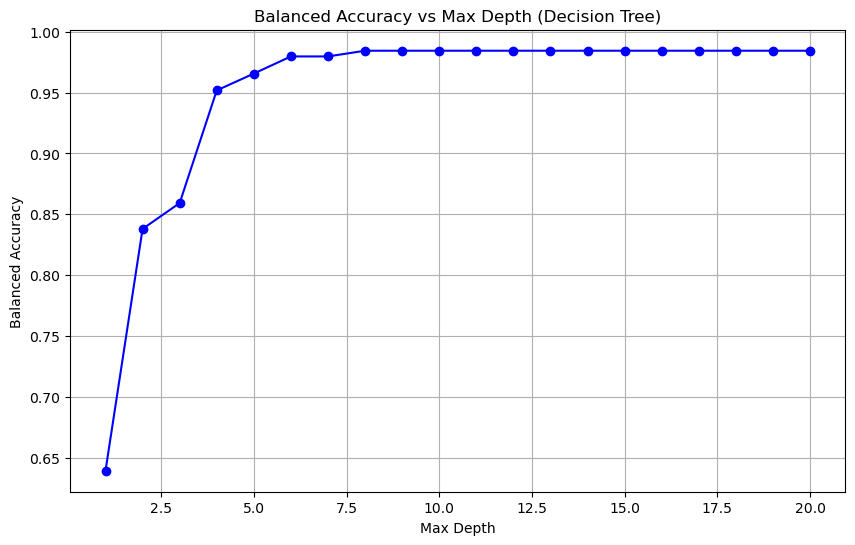

In [73]:
from sklearn.metrics import balanced_accuracy_score

# Define the range for `max_depth`
max_depth_range = range(1, 21)  # From depth 1 to 20

# Initialize a list to store balanced accuracy results
balanced_accuracies = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the training set
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    balanced_accuracies.append(balanced_accuracy)

print(f'Balanced Accuracy for the last max_depth: {balanced_accuracy}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, balanced_accuracies, marker='o', color='blue')
plt.title('Balanced Accuracy vs Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()

Number of Max Depth: 20, Jaccard Index: 0.9682539682539683


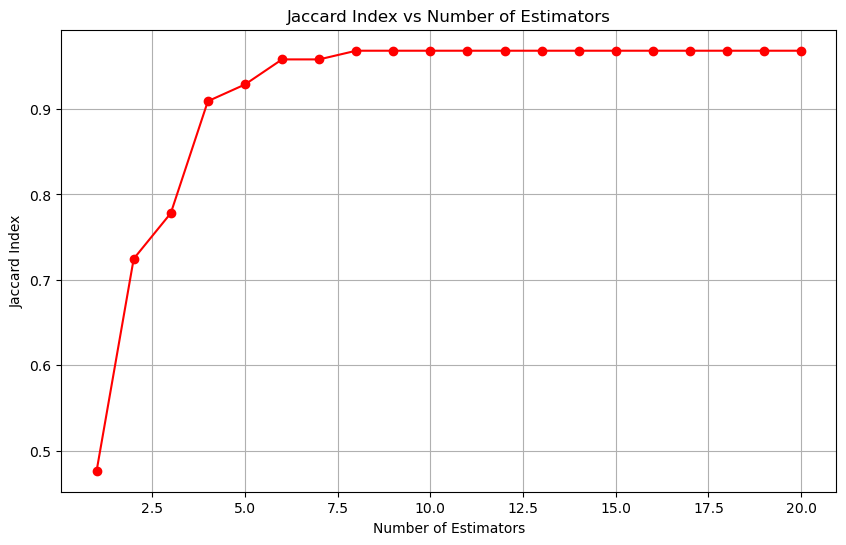

In [74]:
from sklearn.metrics import accuracy_score, jaccard_score

# Define the range for `max_depth`
max_depth_range = range(1, 21)  # From depth 1 to 20

# Initialize lists to store accuracy and Jaccard index results
accuracies = []
jaccard_indices = []

# Train Decision Tree with varying `max_depth`
for max_depth in max_depth_range:
    # Create and train the model
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=2, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)
    
    # Calculate Jaccard Index on the test set
    jaccard = jaccard_score(y_test, y_test_pred, average='macro')
    jaccard_indices.append(jaccard)

print(f'Number of Max Depth: {max_depth}, Jaccard Index: {jaccard}')

# Plot Accuracy vs Max Depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, jaccard_indices, marker='o', color='r')
plt.title('Jaccard Index vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Jaccard Index')
plt.grid(True)
plt.show()

##  Model #2: Random Forest Classifier Model
### 3.2.1 Training a classification model

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit (X_train_tr, y_train)

# Predict on training set
y_pred = forest_clf.predict(X_train_tr)

# Show the RMSE
forest_mse = mean_squared_error(y_pred, y_train)
forest_rmse = np.sqrt(forest_mse)
print('MSE = ', forest_mse)
print('RMSE =', forest_rmse)

MSE =  0.0
RMSE = 0.0


In [76]:
# Show result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))
        
show10results(y_pred, y_train)

Result for the 10 random samples:
actual =       0 pred =      0
actual =       2 pred =      2
actual =       2 pred =      2
actual =       2 pred =      2
actual =       1 pred =      1
actual =       2 pred =      2
actual =       2 pred =      2
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1


### 3.2.2 Evaluating a model using cross-validation

In [77]:
#Perform a 5-fold cross validation on RandomForestRegressor and show the scores. 
from sklearn.model_selection import cross_val_score
k_fold_scores = cross_val_score(forest_clf, X_train_tr, y_train, 
                                scoring = 'neg_mean_squared_error', cv=5)
forest_rmse_scores = np.sqrt(-k_fold_scores)

def display_scores(scores):
    print('Scores:', scores, '\n')
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(forest_rmse_scores)

Scores: [0.24476077 0.20412415 0.21516574 0.21516574 0.24532669] 

Mean: 0.22490861759951658
Standard deviation: 0.016928361959735107


### 3.2.3 Fine tune the model using Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

forest_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the trees
    'max_features': ['sqrt', 'log2'],       # Number of features to consider for the best split
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required at a leaf node
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                           scoring = 'neg_mean_squared_error')

print ('Performing grid search...', end = '')
grid_search.fit(X_train_tr, y_train)
print('done')

Performing grid search...done


In [79]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(n_estimators=200, random_state=42)

In [80]:
print('Best hyperparameter settings:', grid_search.best_params_)
print('RMSE of the best model =', np.sqrt(-grid_search.best_score_))

Best hyperparameter settings: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE of the best model = 0.2172085468500586


In [81]:
# Create and train the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier (n_estimators=200, random_state=42)
forest_clf.fit(X_train_tr, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### 3.2.4 Evaluate system on unseen data

In [82]:
#  Evaluate the best model on test set and compute the RMSE
y_test_pred = best_model.predict(X_test_tr)

final_mse = mean_squared_error(y_test_pred, y_test)
final_rmse = np.sqrt(final_mse)
print('MSE = ', final_mse)
print('RMSE =', final_rmse)

MSE =  0.05166051660516605
RMSE = 0.2272894995488486


Model Accuracy = 1.0
Accuracy with all-false values = 0.2506938020351526
Model Cross_val_score = [0.95391705 0.96296296 0.96296296 0.96759259 0.94444444]


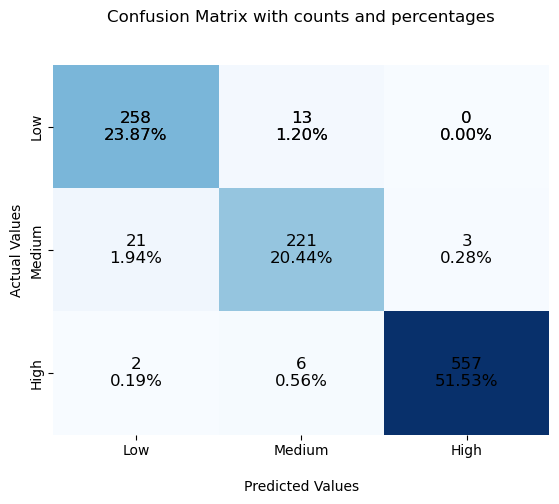

In [83]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, precision_recall_curve, 
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import numpy as np
# Predict on training data
y_train_pred = forest_clf.predict(X_train_tr)

# Test model accuracy
acc = accuracy_score(y_train, y_train_pred)
print('Model Accuracy =', acc)

# Test model accuracy with all false values
y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy with all-false values =', accuracy_score(y_train, y_train_allfalse))

# Compute cross_val_score
cv_score_1 = cross_val_score(forest_clf, X_train_tr, y_train, cv=5, scoring='accuracy')
print('Model Cross_val_score =', cv_score_1)

# Cross-val predict
y_pred_cv_1 = cross_val_predict(forest_clf, X_train_tr, y_train, cv=5)

# Compute confusion matrix
labels = [0,1,2]
cm1 = confusion_matrix(y_train, y_pred_cv_1, labels=labels)
show_matrix(cm1)

In [84]:
# Cross-val predict then compute precision_score, recall_score, and f1_score
print('Precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_1, average='macro')))
print('Recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_1, average='macro')))
print('F1 Score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_1, average='macro')))

Precision = 0.9445
Recall    = 0.9466
F1 Score  = 0.9454


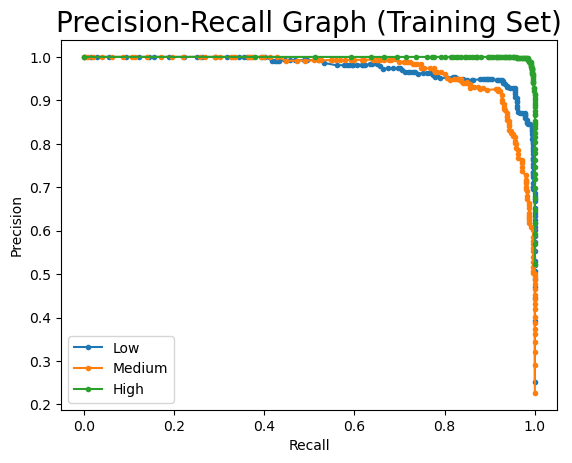

In [85]:
y_pred_proba = cross_val_predict(forest_clf, X_train_tr, y_train, cv=5, method='predict_proba')

label = ['Low', 'Medium', 'High'] 
# Compute precision_recall_curve and visualize (One-vs-Rest for multiclass)
for i in range(y_pred_proba.shape[1]):
    precision_1, recall_1, _ = precision_recall_curve(y_train == i, y_pred_proba[:, i])
    plt.plot(recall_1, precision_1, marker='.', label=label[i])
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

AUC = 0.9928
AUC = 0.9896
AUC = 0.9994


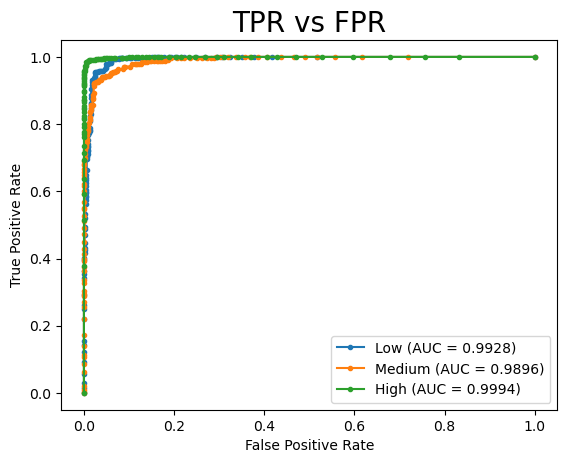

In [86]:
# Compute ROC curve and ROC AUC score (One-vs-Rest for multiclass)
for i in range(y_pred_proba.shape[1]):
    fpr_1, tpr_1, _ = roc_curve(y_train == i, y_pred_proba[:, i])
    auc_1 = roc_auc_score(y_train == i, y_pred_proba[:, i])
    plt.plot(fpr_1, tpr_1, marker='.', label=f'{label[i]} (AUC = {auc_1:.4f})')
    print('AUC = {:.4f}'.format(auc_1))
plt.title('TPR vs FPR', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


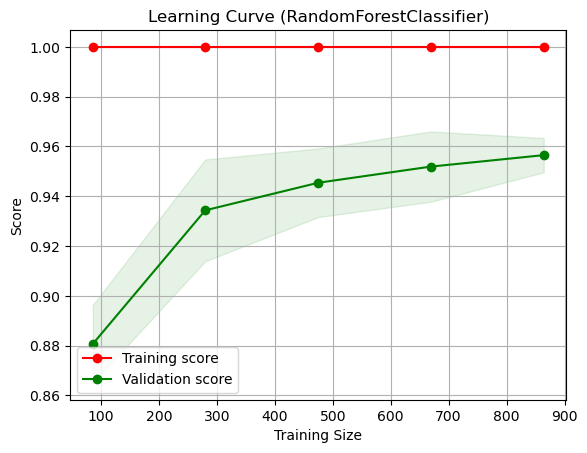

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# Generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    forest_clf, X_train_tr, y_train, cv=5, scoring='accuracy', 
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve (RandomForestClassifier)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

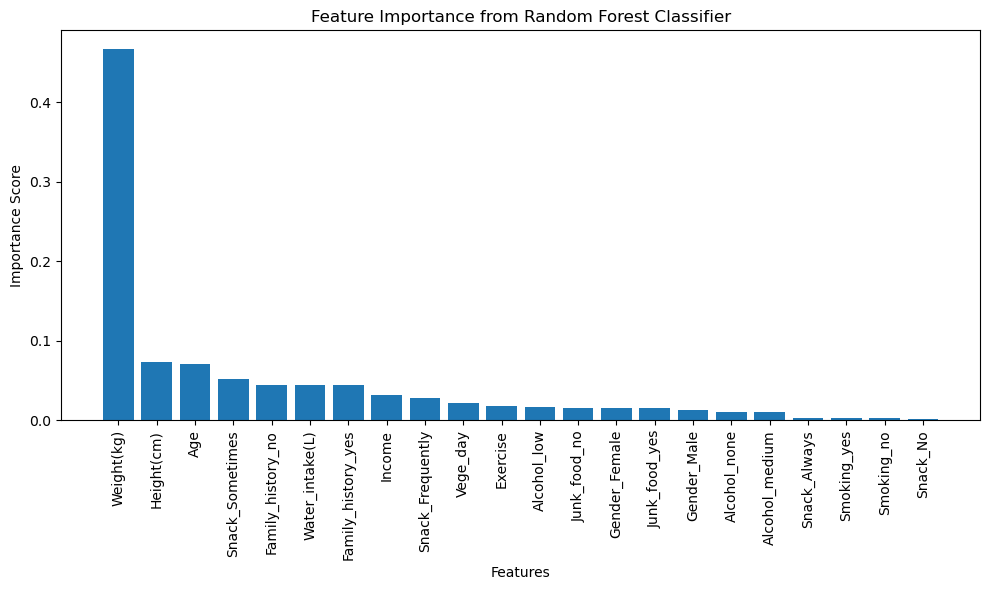

In [88]:
# Get feature importances
importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Define feature names
feature_names = np.array(['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Water_intake(L)', 'Exercise', 'Income',
                          'Gender_Female', 'Gender_Male', 'Family_history_no', 'Family_history_yes',
                          'Alcohol_low', 'Alcohol_medium', 'Alcohol_none', 'Junk_food_no', 'Junk_food_yes',
                          'Snack_Always', 'Snack_Frequently', 'Snack_No', 'Snack_Sometimes', 'Smoking_no', 'Smoking_yes'])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance from Random Forest Classifier')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


In [89]:
from sklearn.metrics import classification_report
# Classification report for the training set
report = classification_report(y_train, y_train_pred, target_names=['low', 'medium', 'high'])
print(report)

              precision    recall  f1-score   support

         low       1.00      1.00      1.00       271
      medium       1.00      1.00      1.00       245
        high       1.00      1.00      1.00       565

    accuracy                           1.00      1081
   macro avg       1.00      1.00      1.00      1081
weighted avg       1.00      1.00      1.00      1081



Accuracy: 1.0


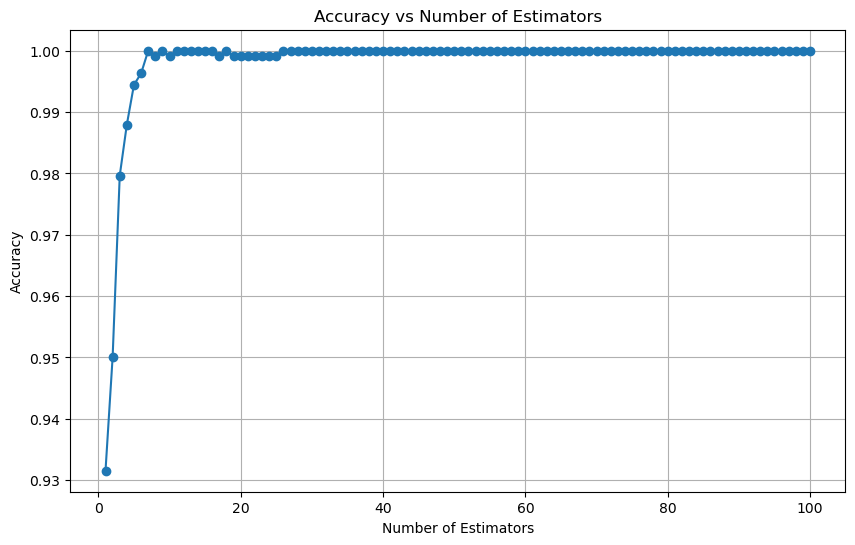

In [90]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store accuracy results
accuracies = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_train_tr)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)

print(f'Accuracy: {accuracy}')
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Cohen's Kappa: 0.9387805814715251


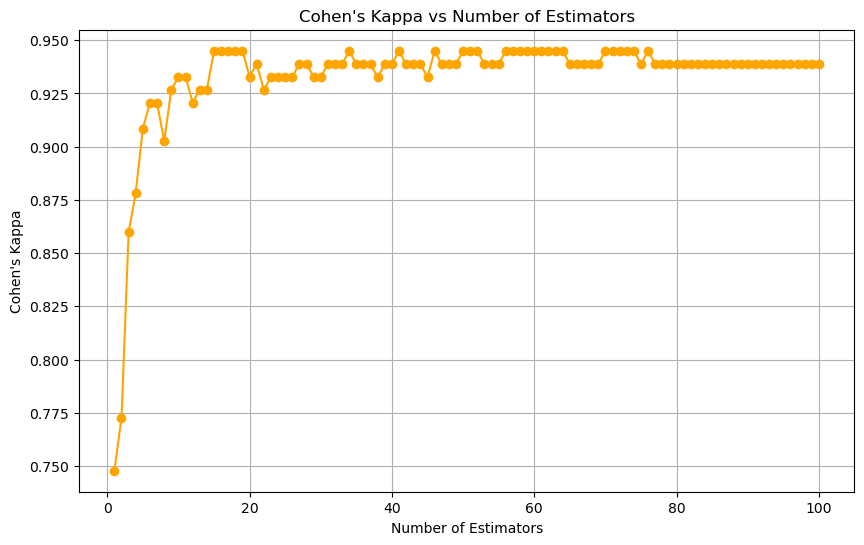

In [91]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store accuracy and Cohen's Kappa results
kappas = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the training set (for Cohen's Kappa)
    y_test_pred = model.predict(X_test_tr)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_test_pred)
    kappas.append(kappa)

print(f'Cohen\'s Kappa: {kappa}')
# Plot the results
plt.figure(figsize=(10, 6))

# Plot Cohen's Kappa
plt.plot(n_estimators_range, kappas, marker='o', color='orange')
plt.title('Cohen\'s Kappa vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cohen\'s Kappa')
plt.grid(True)
plt.show()

In [92]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_train, y_train_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 1.0


In [93]:
from sklearn.metrics import hamming_loss

h_loss = hamming_loss(y_train, y_train_pred)
print(f'Hamming Loss: {h_loss}')

Hamming Loss: 0.0


Balanced Accuracy: 1.0


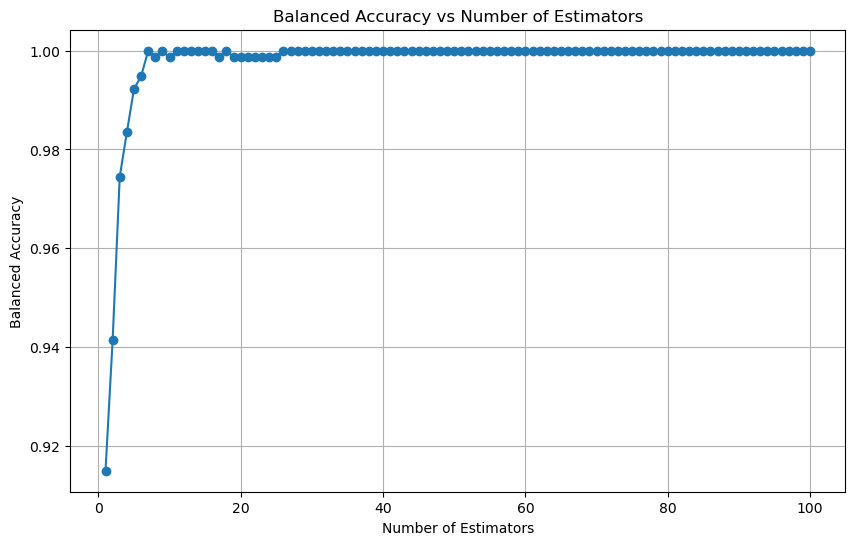

In [94]:
from sklearn.metrics import balanced_accuracy_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store accuracy results
balanced_accuracies = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train_tr)
    
    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    balanced_accuracies.append(balanced_accuracy)

print(f'Balanced Accuracy: {balanced_accuracy}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, balanced_accuracies, marker='o')
plt.title('Balanced Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()


Number of Estimators: 100, Jaccard Index: 1.0


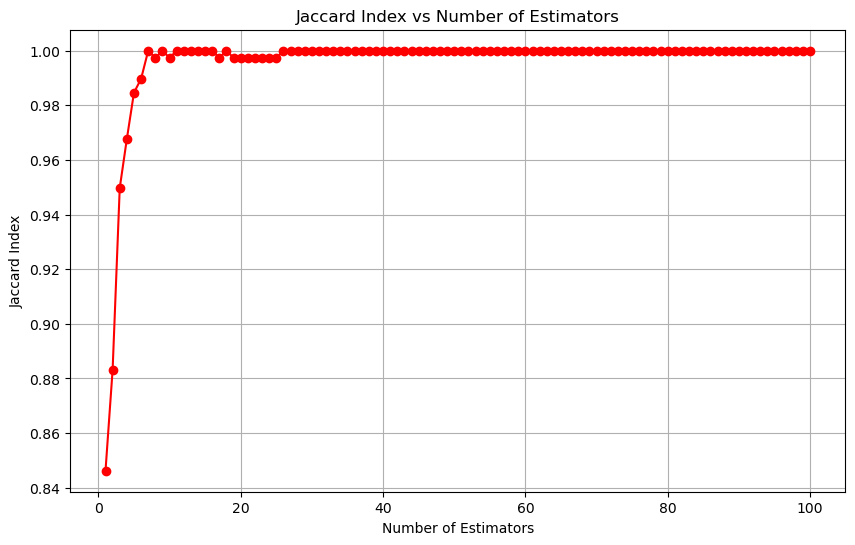

In [95]:
from sklearn.metrics import accuracy_score, jaccard_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store accuracy and Jaccard index results
accuracies = []
jaccard_indices = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_train_pred = model.predict(X_train_tr)
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_train_pred)
    accuracies.append(accuracy)
    
    # Calculate Jaccard Index
    jaccard = jaccard_score(y_train, y_train_pred, average='macro')
    jaccard_indices.append(jaccard)
    
print(f'Number of Estimators: {n_estimators}, Jaccard Index: {jaccard}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, jaccard_indices, marker='o', color='r')
plt.title('Jaccard Index vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Jaccard Index')
plt.grid(True)
plt.show()


### 3.2.5 Evaluate model on test set

Model Accuracy = 0.959409594095941
Accuracy with all-false values = 0.26199261992619927
Model Cross_val_score = [0.90909091 0.87037037 0.98148148 0.92592593 0.92592593]


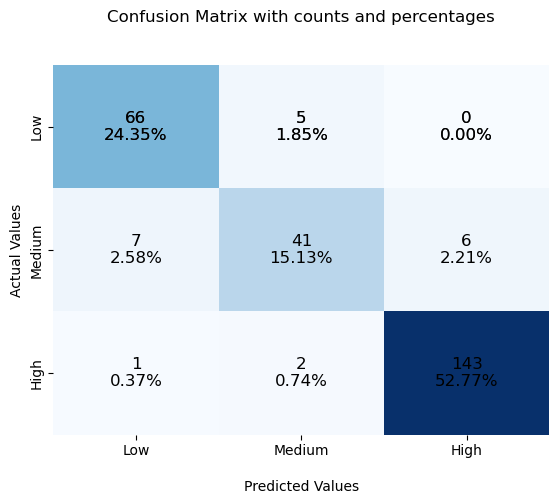

In [96]:
# Predict on testing data
y_test_pred = forest_clf.predict(X_test_tr)

# Test model accuracy
acc = accuracy_score(y_test, y_test_pred)
print('Model Accuracy =', acc)

# Test model accuracy with all false values
y_test_allfalse = np.zeros(len(y_test), dtype=bool)
print('Accuracy with all-false values =', accuracy_score(y_test, y_test_allfalse))

# Compute cross_val_score
cv_score_1 = cross_val_score(forest_clf, X_test_tr, y_test, cv=5, scoring='accuracy')
print('Model Cross_val_score =', cv_score_1)

# Cross-val predict
y_pred_cv_1 = cross_val_predict(forest_clf, X_test_tr, y_test, cv=5)

# Compute confusion matrix
labels = [0,1,2]
cm1 = confusion_matrix(y_test, y_pred_cv_1, labels=labels)
show_matrix(cm1)

In [97]:
# Cross-val predict then compute precision_score, recall_score, and f1_score
print('Precision = {:.4f}'.format(precision_score(y_test, y_pred_cv_1, average='macro')))
print('Recall    = {:.4f}'.format(recall_score(y_test, y_pred_cv_1, average='macro')))
print('F1 Score  = {:.4f}'.format(f1_score(y_test, y_pred_cv_1, average='macro')))

Precision = 0.9019
Recall    = 0.8894
F1 Score  = 0.8946


In [98]:
from sklearn.metrics import classification_report
# Classification report for the training set
report = classification_report(y_test, y_test_pred, target_names=['low', 'medium', 'high'])
print(report)

              precision    recall  f1-score   support

         low       0.91      0.96      0.93        71
      medium       0.92      0.89      0.91        54
        high       1.00      0.99      0.99       146

    accuracy                           0.96       271
   macro avg       0.94      0.94      0.94       271
weighted avg       0.96      0.96      0.96       271



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store accuracy results
accuracies = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tr)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print the final accuracy with the last number of estimators
print(f'Final Accuracy with {n_estimators} estimators: {accuracies[-1]}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store Cohen's Kappa results
kappas = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_test_pred)
    kappas.append(kappa)

print(f'Cohen\'s Kappa: {kappa}')
# Plot the results
plt.figure(figsize=(10, 6))
# Plot Cohen's Kappa
plt.plot(n_estimators_range, kappas, marker='o', color='orange')
plt.title('Cohen\'s Kappa vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cohen\'s Kappa')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_test_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

In [ ]:
from sklearn.metrics import hamming_loss

h_loss = hamming_loss(y_test, y_test_pred)
print(f'Hamming Loss: {h_loss}')

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Define the range of the number of estimators
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store balanced accuracy results
balanced_accuracies = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    balanced_accuracies.append(balanced_accuracy)

# Print the final balanced accuracy
print(f'Final Balanced Accuracy with {n_estimators} estimators: {balanced_accuracy}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, balanced_accuracies, marker='o')
plt.title('Balanced Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import jaccard_score

# Define the range of the number of estimators (analogous to epochs)
n_estimators_range = range(1, 101)  # From 1 to 100

# Initialize lists to store Jaccard score results
jaccard_scores = []

# Train Random Forest with varying number of estimators
for n_estimators in n_estimators_range:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_tr, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_tr)
    
    # Calculate Jaccard Index
    jaccard = jaccard_score(y_test, y_test_pred, average='macro')
    jaccard_scores.append(jaccard)

print(f'Jaccard Index: {jaccard}')
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, jaccard_scores, marker='o', color='r')
plt.title('Jaccard Index vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Jaccard Index')
plt.grid(True)
plt.show()


##  Model #3:  Logistic Regression Model
### 3.3.1 Training a classification model

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# scale feature
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test = scaler.transform(X_test_tr)

log_reg = LogisticRegression()
log_reg.fit(X_train_tr,y_train)

y_pred = log_reg.predict(X_train_tr)

In [70]:
from sklearn.metrics import mean_squared_error

# Show the RMSE
log_reg_mse = mean_squared_error(y_pred, y_train)
log_reg_rmse = np.sqrt(log_reg_mse)
print('MSE = ', log_reg_mse)
print('RMSE =', log_reg_rmse)

MSE =  0.02682701202590194
RMSE = 0.16378953576435198


In [71]:
show10results(y_pred, y_train)

Result for the 10 random samples:
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       2 pred =      2
actual =       2 pred =      2
actual =       2 pred =      2
actual =       1 pred =      1
actual =       2 pred =      2
actual =       1 pred =      1
actual =       2 pred =      2


### 3.3.2 Evaluating a model using cross_validation

In [72]:
#Perform a 5-fold cross validation on RandomForestRegressor and show the scores. 
from sklearn.model_selection import cross_val_score
k_fold_scores = cross_val_score(log_reg, X_train_tr, y_train, 
                                scoring = 'neg_mean_squared_error', cv=5)
log_reg_rmse_scores = np.sqrt(-k_fold_scores)

def display_scores(scores):
    print('Scores:', scores, '\n')
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(log_reg_rmse_scores)

Scores: [0.20365327 0.22566773 0.20412415 0.18002057 0.20412415] 

Mean: 0.20351797377447722
Standard deviation: 0.014446403000074826


### 3.3.3 Fine-tune the model using Grid Search

In [73]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning


# Initialize logistic regression with the 'saga' solver and increased max_iter
log_reg = LogisticRegression(solver='saga', max_iter=10000)

# Define the hyperparameter grid
param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['saga']  # 'saga' supports both 'l1' and 'l2'
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.5, 0.7, 0.9],
        'solver': ['saga']  # 'saga' is required for 'elasticnet'
    }
]

# Set up the grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Suppress ConvergenceWarning during grid search
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X_train_tr, y_train)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.4f}')

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Test Set Accuracy: 0.9963


In [74]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')

In [75]:
print('Best hyperparameter settings:', grid_search.best_params_)
print('RMSE of the best model =', np.sqrt(grid_search.best_score_))

Best hyperparameter settings: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
RMSE of the best model = 0.9944332168468581


### 3.3.4 Evaluate system on unseen data

Model Accuracy = 1.0
Accuracy with all-false values = 0.2506938020351526
Model Cross_val_score = [0.99078341 0.98611111 0.99074074 1.         0.97685185]


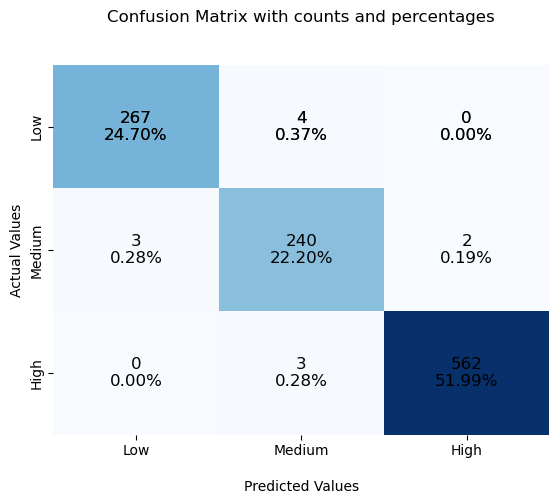

Precision = 0.9857
Recall    = 0.9865
F1 Score  = 0.9861


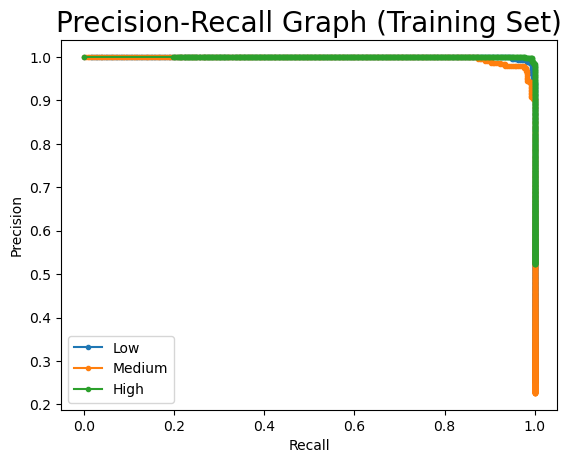

In [91]:
# Create and train the Logistic Regression Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = LogisticRegression (C=10, max_iter=10000, penalty='l1', solver='saga')
clf.fit(X_train_tr, y_train)

# Predict on test set
y_pred = best_model.predict(X_train_tr)
final_mse = mean_squared_error(y_train, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

# Predict on training data
y_pred = clf.predict(X_train_tr)

# Test model accuracy
acc = accuracy_score(y_train, y_pred)
print('Model Accuracy =', acc)

# Test model accuracy with all false values
y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy with all-false values =', accuracy_score(y_train, y_train_allfalse))

# Compute cross_val_score
cv_score_1 = cross_val_score(clf, X_train_tr, y_train, cv=5, scoring='accuracy')
print('Model Cross_val_score =', cv_score_1)

# Cross-val predict
y_pred_cv_1 = cross_val_predict(clf, X_train_tr, y_train, cv=5)

# Compute confusion matrix
labels = [0,1,2]
cm1 = confusion_matrix(y_train, y_pred_cv_1, labels=labels)
show_matrix(cm1)

# Cross-val predict then compute precision_score, recall_score, and f1_score
print('Precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_1, average='macro')))
print('Recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_1, average='macro')))
print('F1 Score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_1, average='macro')))

y_pred_proba = cross_val_predict(clf, X_train_tr, y_train, cv=5, method='predict_proba')

label = ['Low', 'Medium', 'High'] 
# Compute precision_recall_curve and visualize (One-vs-Rest for multiclass)
for i in range(y_pred_proba.shape[1]):
    precision_1, recall_1, _ = precision_recall_curve(y_train == i, y_pred_proba[:, i])
    plt.plot(recall_1, precision_1, marker='.', label=label[i])
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

AUC = 0.9998
AUC = 0.9991
AUC = 0.9999


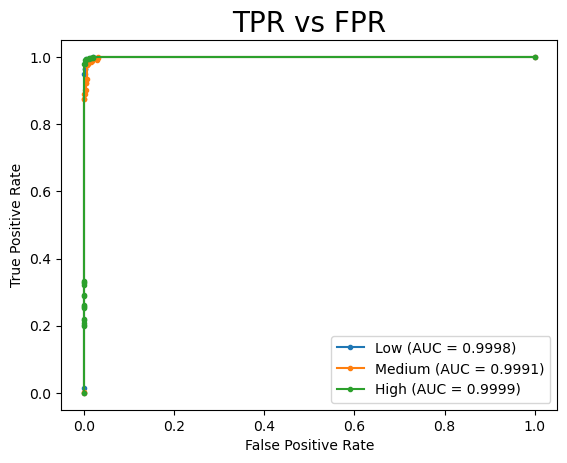

In [102]:
# Compute ROC curve and ROC AUC score (One-vs-Rest for multiclass)
for i in range(y_pred_proba.shape[1]):
    fpr_1, tpr_1, _ = roc_curve(y_train == i, y_pred_proba[:, i])
    auc_1 = roc_auc_score(y_train == i, y_pred_proba[:, i])
    plt.plot(fpr_1, tpr_1, marker='.', label=f'{label[i]} (AUC = {auc_1:.4f})')
    print('AUC = {:.4f}'.format(auc_1))
plt.title('TPR vs FPR', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

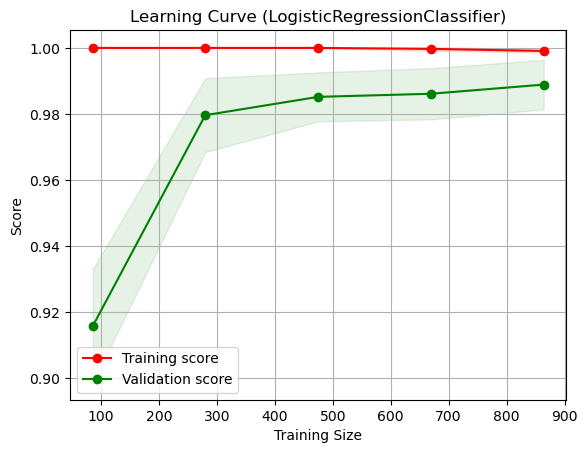

In [105]:
from sklearn.model_selection import learning_curve

# Generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_train_tr, y_train, cv=5, scoring='accuracy', 
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve (LogisticRegressionClassifier)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

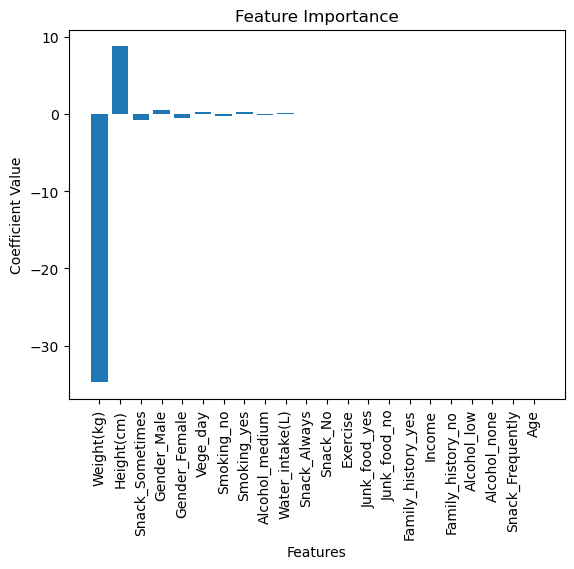

In [107]:
# Get feature importances
coefficients = clf.coef_[0]  # Get the coefficients (for binary classification)
indices = np.argsort(np.abs(coefficients))[::-1]  # Sort features by the absolute value of their coefficients
feature_names = np.array(['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Water_intake(L)', 'Exercise', 'Income', 'Gender_Female', 'Gender_Male', 'Family_history_no', 'Family_history_yes', 'Alcohol_low', 'Alcohol_medium', 'Alcohol_none', 'Junk_food_no', 'Junk_food_yes', 'Snack_Always', 'Snack_Frequently', 'Snack_No', 'Snack_Sometimes', 'Smoking_no', 'Smoking_yes'])

# Plot feature importances
plt.figure()
plt.title('Feature Importance')
plt.bar(range(len(coefficients)), coefficients[indices], align='center')
plt.xticks(range(len(coefficients)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [108]:
from sklearn.metrics import classification_report
# Classification report for the training set
report = classification_report(y_train, y_train_pred, target_names=['low', 'medium', 'high'])
print(report)

              precision    recall  f1-score   support

         low       0.97      0.99      0.98       271
      medium       0.98      0.96      0.97       245
        high       1.00      1.00      1.00       565

    accuracy                           0.99      1081
   macro avg       0.98      0.98      0.98      1081
weighted avg       0.99      0.99      0.99      1081



In [109]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train, y_train_pred)
print(f'Cohen\'s Kappa: {kappa}')

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, y_train_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

from sklearn.metrics import hamming_loss
h_loss = hamming_loss(y_train, y_train_pred)
print(f'Hamming Loss: {h_loss}')

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print(f'Balanced Accuracy: {balanced_accuracy}')

from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_train, y_train_pred, average='macro')
print(f'Jaccard Index: {jaccard}')

Cohen's Kappa: 0.9773248496713747
Matthews Correlation Coefficient: 0.9773787792758181
Hamming Loss: 0.013876040703052728
Balanced Accuracy: 0.9801139644049502
Jaccard Index: 0.9632677092851122


### 3.3.5 Evaluate model on test set

Model Accuracy = 0.992619926199262
Accuracy with all-false values = 0.26199261992619927
Model Cross_val_score = [0.96363636 1.         1.         0.98148148 1.        ]


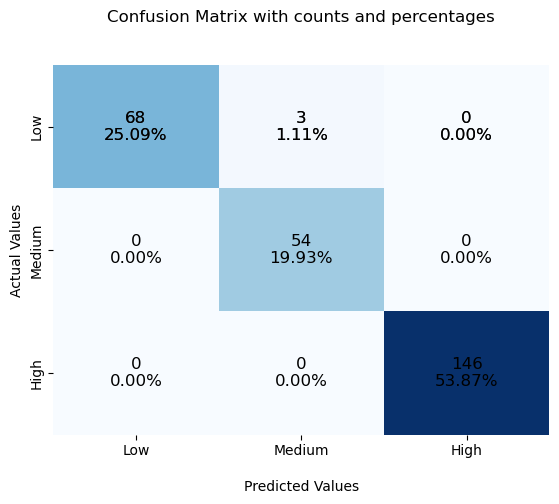

Precision = 0.9825
Recall    = 0.9859
F1 Score  = 0.9838


In [93]:
# Predict on testing data
y_pred = clf.predict(X_test_tr)

# Test model accuracy
acc = accuracy_score(y_test, y_pred)
print('Model Accuracy =', acc)

# Test model accuracy with all false values
y_test_allfalse = np.zeros(len(y_test), dtype=bool)
print('Accuracy with all-false values =', accuracy_score(y_test, y_test_allfalse))

# Compute cross_val_score
cv_score_2 = cross_val_score(clf, X_test_tr, y_test, cv=5, scoring='accuracy')
print('Model Cross_val_score =', cv_score_2)

# Cross-val predict
y_pred_cv_2 = cross_val_predict(clf, X_test_tr, y_test, cv=5)

# Compute confusion matrix
labels = [0,1,2]
cm2 = confusion_matrix(y_test, y_pred_cv_2, labels=labels)
show_matrix(cm2)

# Cross-val predict then compute precision_score, recall_score, and f1_score
print('Precision = {:.4f}'.format(precision_score(y_test, y_pred_cv_2, average='macro')))
print('Recall    = {:.4f}'.format(recall_score(y_test, y_pred_cv_2, average='macro')))
print('F1 Score  = {:.4f}'.format(f1_score(y_test, y_pred_cv_2, average='macro')))

In [111]:
from sklearn.metrics import classification_report
# Classification report for the testing set
report = classification_report(y_test, y_test_pred, target_names=['low', 'medium', 'high'])
print(report)

              precision    recall  f1-score   support

         low       0.97      0.97      0.97        71
      medium       0.96      0.96      0.96        54
        high       1.00      1.00      1.00       146

    accuracy                           0.99       271
   macro avg       0.98      0.98      0.98       271
weighted avg       0.99      0.99      0.99       271



In [112]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_test_pred)
print(f'Cohen\'s Kappa: {kappa}')

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

from sklearn.metrics import hamming_loss
h_loss = hamming_loss(y_test, y_test_pred)
print(f'Hamming Loss: {h_loss}')

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print(f'Balanced Accuracy: {balanced_accuracy}')

from sklearn.metrics import jaccard_score
jaccard = jaccard_score(y_test, y_test_pred, average='macro')
print(f'Jaccard Index: {jaccard}')

Cohen's Kappa: 0.9754573446839341
Matthews Correlation Coefficient: 0.9754573446839341
Hamming Loss: 0.014760147601476014
Balanced Accuracy: 0.9782646496261519
Jaccard Index: 0.9579256360078278


---
# 4.0 Comparing Classifiers
## 4.1 Precision and recall performance using 3 fold cross-validation

### 4.1.1 Create and evaluate the performance of DecisionTreeClassifier classifier

In [145]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=42)

# Define scoring with appropriate average for multiclass
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Perform cross-validation
tree_result = cross_validate(tree_clf, X_train_tr, y_train, cv=3, scoring=scoring)

# Print the results
print('Decision Tree: validation accuracy  = {:.4f}'.format(tree_result['test_accuracy'].mean()))
print('Decision Tree: validation recall    = {:.4f}'.format(tree_result['test_recall_macro'].mean()))
print('Decision Tree: validation precision = {:.4f}'.format(tree_result['test_precision_macro'].mean()))
print('Decision Tree: validation f1        = {:.4f}'.format(tree_result['test_f1_macro'].mean()))

Decision Tree: validation accuracy  = 0.9695
Decision Tree: validation recall    = 0.9590
Decision Tree: validation precision = 0.9601
Decision Tree: validation f1        = 0.9592


### 4.1.2 Create and evaluate the performance of RandomForestClassifier classifier

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier (n_estimators = 200, random_state = 42)
forest_result = cross_validate (forest_clf, X_train_tr, y_train, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

print('Forest: validation accuracy  = {:.4f}'.format(forest_result['test_accuracy'].mean()))
print('Forest: validation recall    = {:.4f}'.format(forest_result['test_recall_macro'].mean()))
print('Forest: validation precision = {:.4f}'.format(forest_result['test_precision_macro'].mean()))
print('Forest: validation f1        = {:.4f}'.format(forest_result['test_f1_macro'].mean()))

Forest: validation accuracy  = 0.9510
Forest: validation recall    = 0.9344
Forest: validation precision = 0.9361
Forest: validation f1        = 0.9347


### 4.1.3 Create and evaluate the performance of LogisticRegressionClassifier classifier

In [96]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Initialize LogisticRegression
log_reg_clf = LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')  # Increase max_iter to ensure convergence

# Define scoring with appropriate average for multiclass
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Perform cross-validation
log_reg_result = cross_validate(log_reg_clf, X_train_tr, y_train, cv=3, scoring=scoring)

# Print the results
print('Logistic Regression: validation accuracy  = {:.4f}'.format(log_reg_result['test_accuracy'].mean()))
print('Logistic Regression: validation recall    = {:.4f}'.format(log_reg_result['test_recall_macro'].mean()))
print('Logistic Regression: validation precision = {:.4f}'.format(log_reg_result['test_precision_macro'].mean()))
print('Logistic Regression: validation f1        = {:.4f}'.format(log_reg_result['test_f1_macro'].mean()))

Logistic Regression: validation accuracy  = 0.9861
Logistic Regression: validation recall    = 0.9820
Logistic Regression: validation precision = 0.9821
Logistic Regression: validation f1        = 0.9819


**Analysis**: From the above results, we can see that *RandomForestClassifier* performs not as good, this is because it is a non-linear classifier and thus suffer from *overfitting*. The performance of *LogisticRegressionClassifier* is the best since it is able to model linear classification data quite well.

## 4.2 Comparing classifiers using the ROC curve

In [97]:
print('Computing scores for DecisionTreeClassifier...', end = '')
y_scores_tree   = cross_val_predict (tree_clf, X_train_tr, y_train, cv=3, method = 'predict_proba')
print('done')

print('Computing scores for RandomForestClassifier...', end = '')
y_scores_forest = cross_val_predict (forest_clf, X_train_tr, y_train, cv=3, method = 'predict_proba')
print('done')

print('Computing scores for LogisticRegressionClassifier...', end = '')
y_scores_log_reg = cross_val_predict (log_reg_clf, X_train_tr, y_train, cv=3, method = 'predict_proba')
print('done')

Computing scores for DecisionTreeClassifier...done
Computing scores for RandomForestClassifier...done
Computing scores for LogisticRegressionClassifier...done


In [98]:
print('Shape of y_scores_tree:', y_scores_tree.shape)
print('Shape of y_scores_forest:', y_scores_forest.shape)
print('Shape of y_scores_log_reg:', y_scores_log_reg.shape)

Shape of y_scores_tree: (1081, 3)
Shape of y_scores_forest: (1081, 3)
Shape of y_scores_log_reg: (1081, 3)


## 4.3 Plot the ROC curves for all three classifiers.

In [99]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output (one-vs-rest)
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_train_binarized.shape[1]

# Compute ROC curve and ROC area for each class for DecisionTreeClassifier
fpr_tree = {}
tpr_tree = {}
thresholds_tree = {}

for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], thresholds_tree[i] = roc_curve(y_train_binarized[:, i], y_scores_tree[:, i])

# Compute ROC curve and ROC area for each class for RandomForestClassifier
fpr_forest = {}
tpr_forest = {}
thresholds_forest = {}

for i in range(n_classes):
    fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(y_train_binarized[:, i], y_scores_forest[:, i])

# Compute ROC curve and ROC area for each class for LogisticRegressionClassifier
fpr_log_reg = {}
tpr_log_reg = {}
thresholds_log_reg = {}

for i in range(n_classes):
    fpr_log_reg[i], tpr_log_reg[i], thresholds_log_reg[i] = roc_curve(y_train_binarized[:, i], y_scores_log_reg[:, i])


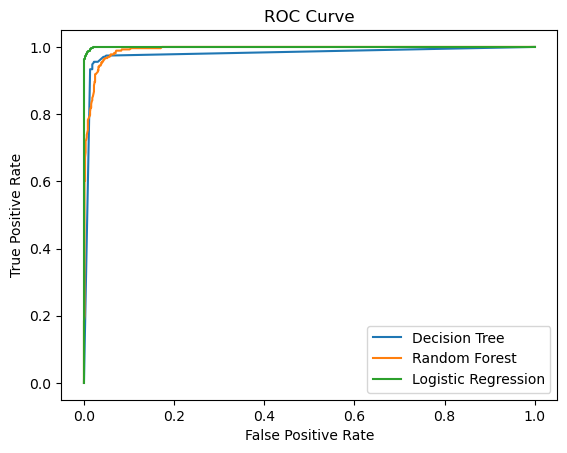

In [100]:
plt.figure()
plt.plot(fpr_tree[0], tpr_tree[0], label='Decision Tree')
plt.plot(fpr_forest[0], tpr_forest[0], label='Random Forest')
plt.plot(fpr_log_reg[0], tpr_log_reg[0], label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## 4.4 Compute and show the AUC measures for the classifiers.

In [101]:
from sklearn.metrics import roc_auc_score

auc_tree = roc_auc_score(y_train, y_scores_tree, multi_class='ovr', average='macro')
print('AUC for DecisionTreeClassifier = {:.4f}'.format(auc_tree))

auc_forest = roc_auc_score(y_train, y_scores_forest, multi_class='ovr', average='macro')
print('AUC for RandomForestClassifier = {:.4f}'.format(auc_forest))

auc_log_reg = roc_auc_score(y_train, y_scores_log_reg, multi_class='ovr', average='macro')
print('AUC for LogisticRegressionClassifir = {:.4f}'.format(auc_log_reg))

AUC for DecisionTreeClassifier = 0.9820
AUC for RandomForestClassifier = 0.9930
AUC for LogisticRegressionClassifir = 0.9996


In [ ]:
#end